In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_columns = None
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
GLOBAL_RANDOM_STATE = 158

In [3]:
%ls

 Том в устройстве E имеет метку Новый том
 Серийный номер тома: C01F-4EE3

 Содержимое папки E:\GeekBrains\Python для Data Science\GeekBrains_AI_Python_for_data_science\CourseProject

21.02.2019  00:01    <DIR>          .
21.02.2019  00:01    <DIR>          ..
20.02.2019  21:26    <DIR>          .ipynb_checkpoints
19.02.2019  14:40         3 106 438 cleanovik.ipynb
20.02.2019  03:27         3 418 102 cleanovik_copy_01.ipynb
20.02.2019  21:20         2 469 684 cleanovik_r2_0.7595.ipynb
21.02.2019  00:01         2 900 026 cleanovik_r2_0000000.ipynb
18.02.2019  14:52    <DIR>          Kurs_project_task
16.02.2019  16:09           533 979 Kurs_project_task.zip
20.02.2019  21:18           124 051 NPomazan_predictions.csv
20.02.2019  21:19           124 051 NPomazan_predictions_%.5f.csv
20.02.2019  21:19           124 051 NPomazan_predictions_0.75950.csv
20.02.2019  21:19           124 051 NPomazan_predictions_0.7595024670175243.csv
20.02.2019  21:10           124 051 pred.csv
13.02.2019  23

**Загружаем "сырые" данные**

In [4]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

**Оцениваем "сырые" данные**

In [5]:
train_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
test_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [7]:
train_raw.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
test_raw.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [9]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [10]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [11]:
train, valid = train_test_split(train_raw, test_size=0.3, random_state=GLOBAL_RANDOM_STATE)

In [12]:
feature_name = 'Ecology_2'
train[feature_name] = (train[feature_name] == "A").astype(int)
valid[feature_name] = (valid[feature_name] == "A").astype(int)
test_raw[feature_name] = (test_raw[feature_name] == "A").astype(int)

C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
feature_name = 'Ecology_3'
train[feature_name] = (train[feature_name] == "A").astype(int)
valid[feature_name] = (valid[feature_name] == "A").astype(int)
test_raw[feature_name] = (test_raw[feature_name] == "A").astype(int)

C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
feature_name = 'Shops_2'
train[feature_name] = (train[feature_name] == "A").astype(int)
valid[feature_name] = (valid[feature_name] == "A").astype(int)
test_raw[feature_name] = (test_raw[feature_name] == "A").astype(int)

C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Жилая площадь 'LifeSquare' имеет незаполненные значения, значения превышающие имеющуюся площадь 'Square', а так же наоборот, значения сильно меньше чем площадь 'Square'.**

Text(0.5, 1.0, 'Square/LifeSquare (Train)')

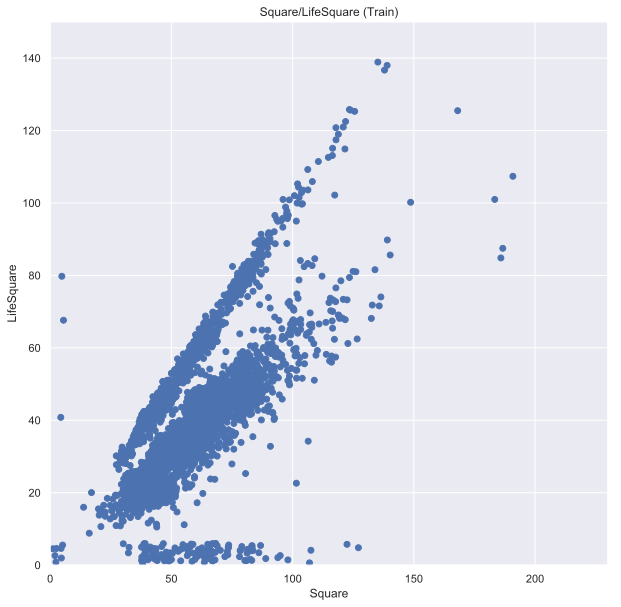

In [15]:
sns.set(rc={'figure.figsize':(10.,10.)})
plt.scatter(train['Square'], train['LifeSquare'])
plt.ylim(0, 150)
plt.xlim(0, 230)
plt.xlabel("Square")
plt.ylabel("LifeSquare")
plt.title('Square/LifeSquare (Train)')

**Для начала мы создадим копию данных, в которых просто зададим медианные значения жилой площади 'LifeSquare' и 'Healthcare_1' всем записям, имеющим незаполненные значения.**

In [16]:
lifesquare_median = train.LifeSquare.median()
lifesquare_median

32.657097251242504

In [17]:
healthcare_1_median = train.Healthcare_1.median()
healthcare_1_median

900.0

In [18]:
train_median = train.copy()
valid_median = valid.copy()

In [19]:
train_median.LifeSquare = train_median.LifeSquare.fillna(lifesquare_median)
valid_median.LifeSquare = valid_median.LifeSquare.fillna(lifesquare_median)

In [20]:
train_median.Healthcare_1 = train_median.Healthcare_1.fillna(healthcare_1_median)
valid_median.Healthcare_1 = valid_median.Healthcare_1.fillna(healthcare_1_median)

In [21]:
train_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 56 to 7069
Data columns (total 20 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       7000 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null int32
Ecology_3        7000 non-null int32
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     7000 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null int32
Price            7000 non-null float64
dtypes: float64(8), int32(3), int64(9)
memory usage: 1.0 MB


In [22]:
valid_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 4387 to 6102
Data columns (total 20 columns):
Id               3000 non-null int64
DistrictId       3000 non-null int64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       3000 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null int64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null int64
Ecology_1        3000 non-null float64
Ecology_2        3000 non-null int32
Ecology_3        3000 non-null int32
Social_1         3000 non-null int64
Social_2         3000 non-null int64
Social_3         3000 non-null int64
Healthcare_1     3000 non-null float64
Helthcare_2      3000 non-null int64
Shops_1          3000 non-null int64
Shops_2          3000 non-null int32
Price            3000 non-null float64
dtypes: float64(8), int32(3), int64(9)
memory usage: 457.0 KB


**В качестве отправной точки получим результат на "медианных" данных, используя LinearRegression модель.**  
Так же нам понадобится разбить данные с ответами на тренировочные и валидационные.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [24]:
lr_median = LinearRegression()

In [25]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    y_pred_train = model.predict(X_train.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Test data:")
    print("\tMSE: %.5f" % mse)
    print("\tMAE: %.5f" % mae)
    print("\tR2_SCORE: %.5f" % r2)
    print("Train data:")
    print("\tMSE: %.5f" % mean_squared_error(y_train, y_pred_train))
    print("\tMAE: %.5f" % mean_absolute_error(y_train, y_pred_train))
    print("\tR2_SCORE: %.5f" % r2_score(y_train, y_pred_train))
    
    return mse, mae, r2

In [26]:
feats_to_train_median = train_median.columns.tolist()
feats_to_train_median.remove('Id')
feats_to_train_median.remove('Price')
feats_to_train_median

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [27]:
mse_median, mae_median, r2_median = create_model(train_median, train_median['Price'], valid_median, valid_median['Price'], feats_to_train_median, lr_median)

Test data:
	MSE: 4472285545.40973
	MAE: 44965.84641
	R2_SCORE: 0.49353
Train data:
	MSE: 4373132276.16034
	MAE: 45046.42754
	R2_SCORE: 0.48769


**Наводим порядок в данных в столбцах 'Square' и 'LifeSquare':**

In [28]:
train.Square.describe()

count    7000.000000
mean       56.343488
std        20.860752
min         1.136859
25%        41.743257
50%        52.571863
75%        65.874776
max       604.705972
Name: Square, dtype: float64

In [29]:
train.LifeSquare.describe()

count    5496.000000
mean       37.417046
std       102.187076
min         0.370619
25%        22.708055
50%        32.657097
75%        44.953243
max      7480.592129
Name: LifeSquare, dtype: float64

In [30]:
valid.Square.describe()

count    3000.000000
mean       56.251111
std        21.516983
min         2.954309
25%        41.832425
50%        52.440032
75%        65.980391
max       641.065193
Name: Square, dtype: float64

In [31]:
valid.LifeSquare.describe()

count    2391.000000
mean       36.699922
std        23.067583
min         1.071193
25%        23.009414
50%        32.990847
75%        45.349616
max       638.163193
Name: LifeSquare, dtype: float64

**Находим необходимые значения для 1/2/3/4 комнатных квартир:**

In [32]:
square_fix_data = dict()

In [33]:
for n_rooms in range(1, 5):
    valid_by_condition = train.loc[train.Rooms==n_rooms].loc[(train.LifeSquare>0.3*train.Square) & (train.LifeSquare <= train.Square)]
    mean_lifesquare = valid_by_condition.LifeSquare.mean()
    mean_square = valid_by_condition.Square.mean()
    std_lifesquare = valid_by_condition.LifeSquare.std()
    std_square = valid_by_condition.Square.std()
    lifesquare_to_square_coef = mean_lifesquare / mean_square
    square_fix_data[n_rooms] = {"mean_lifesquare": mean_lifesquare, 
                                "mean_square": mean_square, 
                                "std_lifesquare": std_lifesquare, 
                                "std_square": std_square, 
                                "lifesquare_to_square_coef": lifesquare_to_square_coef}

**Функция оценки и изменения значений площади 'Square' и жилой площади 'LifeSquare':**

In [34]:
def check_valid(x, std, mean):
    coef_lower = 1.7
    coef_higher = 6
    return (mean - x < coef_lower * std) if x < mean else (x - mean < coef_higher * std)
def check_sq_and_ls(x):
    n_rooms = int(x.Rooms) if int(x.Rooms) in {1,2,3,4} else 4
    
    mean_lifesquare = square_fix_data[n_rooms]["mean_lifesquare"]
    mean_square = square_fix_data[n_rooms]["mean_square"]
    std_lifesquare = square_fix_data[n_rooms]["std_lifesquare"]
    std_square = square_fix_data[n_rooms]["std_square"]
    lifesquare_to_square_coef = square_fix_data[n_rooms]["lifesquare_to_square_coef"]
    
    valid_square = check_valid(x.Square, std_square, mean_square)
    valid_lifesquare = check_valid(x.LifeSquare, std_lifesquare, mean_lifesquare)
    
    if not valid_square and not valid_lifesquare:
        x.Square = mean_square
        x.LifeSquare = mean_lifesquare
    elif not valid_square:
        x.Square = x.LifeSquare / lifesquare_to_square_coef
    elif not valid_lifesquare:
        x.LifeSquare = x.Square * lifesquare_to_square_coef
    return x

In [35]:
train = train.apply(check_sq_and_ls, axis=1)
valid = valid.apply(check_sq_and_ls, axis=1)
test_raw = test_raw.apply(check_sq_and_ls, axis=1)

**Вроде стало получше:**

Text(0, 0.5, 'LifeSquare')

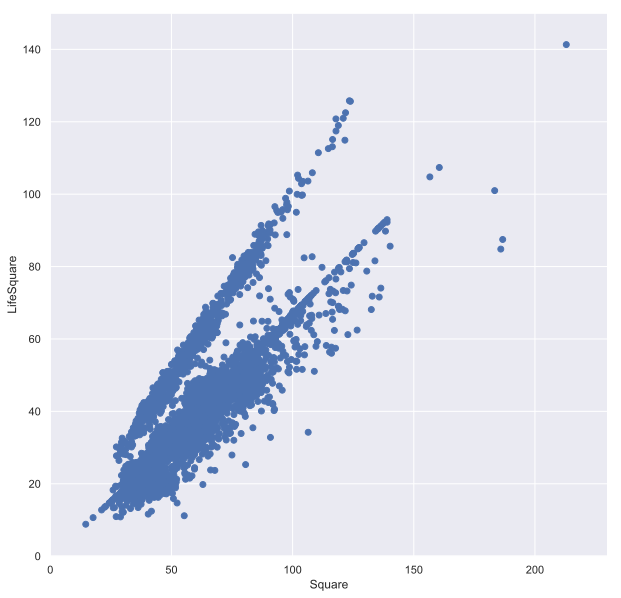

In [36]:
plt.scatter(train['Square'], train['LifeSquare'])
plt.ylim(0, 150)
plt.xlim(0, 230)
plt.xlabel("Square")
plt.ylabel("LifeSquare")

In [37]:
train.Square.describe()

count    7000.000000
mean       56.113555
std        18.455073
min        14.633032
25%        41.733199
50%        52.792904
75%        65.895492
max       212.932361
Name: Square, dtype: float64

In [38]:
train.LifeSquare.describe()

count    7000.000000
mean       36.996830
std        15.503261
min         8.822988
25%        24.449867
50%        33.758647
75%        45.277500
max       141.324697
Name: LifeSquare, dtype: float64

In [39]:
valid.Square.describe()

count    3000.000000
mean       55.964680
std        18.325485
min        18.939869
25%        41.810149
50%        52.440032
75%        65.934047
max       200.334539
Name: Square, dtype: float64

In [40]:
valid.LifeSquare.describe()

count    3000.000000
mean       37.118258
std        15.710708
min        11.047605
25%        24.761543
50%        33.726713
75%        45.348905
max       136.215499
Name: LifeSquare, dtype: float64

In [41]:
test_raw.Square.describe()

count    5000.000000
mean       56.418693
std        18.626478
min        15.748180
25%        41.879570
50%        52.924953
75%        66.289167
max       223.453689
Name: Square, dtype: float64

In [42]:
test_raw.LifeSquare.describe()

count    5000.000000
mean       37.343001
std        15.610709
min         9.495367
25%        24.768871
50%        34.068202
75%        45.670646
max       128.230078
Name: LifeSquare, dtype: float64

**Исправим площадь кухни 'KitchenSquare':**

In [43]:
train.KitchenSquare.describe()

count    7000.000000
mean        6.431571
std        33.975625
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max      2014.000000
Name: KitchenSquare, dtype: float64

In [44]:
valid.KitchenSquare.describe()

count    3000.000000
mean        5.904000
std         5.054302
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max        96.000000
Name: KitchenSquare, dtype: float64

In [45]:
test_raw.KitchenSquare.describe()

count    5000.000000
mean        5.976800
std         9.950018
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max       620.000000
Name: KitchenSquare, dtype: float64

In [46]:
kitchensquare_fix_data = dict()

In [47]:
for n_rooms in range(1, 5):
    valid_by_condition = train.loc[(train.Rooms==n_rooms) & (train.KitchenSquare >= 3)]
    mean_kitchensquare = valid_by_condition.KitchenSquare.mean()
    mean_square = valid_by_condition.Square.mean()
    kitchensquare_to_square_coef = mean_kitchensquare / mean_square
    std_kitchensquare = valid_by_condition.KitchenSquare.std()
    kitchensquare_fix_data[n_rooms] = {"kitchensquare_to_square_coef": kitchensquare_to_square_coef,
                                      "std_kitchensquare": std_kitchensquare}

In [48]:
def check_kitchensquare(x):
    n_rooms = int(x.Rooms) if int(x.Rooms) in {1,2,3,4} else 4
    
    kitchensquare_to_square_coef = kitchensquare_fix_data[n_rooms]["kitchensquare_to_square_coef"]

    if x.KitchenSquare < 3 or x.KitchenSquare > (x.Square - x.LifeSquare) or x.KitchenSquare < (0.5 * x.Square * kitchensquare_to_square_coef):
        x.KitchenSquare = x.Square * kitchensquare_to_square_coef
    
    return x

In [49]:
train = train.apply(check_kitchensquare, axis=1)
valid = valid.apply(check_kitchensquare, axis=1)
test_raw = test_raw.apply(check_kitchensquare, axis=1)

In [50]:
train.KitchenSquare.describe()

count    7000.000000
mean        8.859310
std         2.694408
min         3.000000
25%         7.000000
50%         9.000000
75%        10.131548
max        43.000000
Name: KitchenSquare, dtype: float64

In [51]:
valid.KitchenSquare.describe()

count    3000.000000
mean        8.855483
std         2.592877
min         4.000000
25%         7.000000
50%         9.000000
75%        10.143656
max        25.000000
Name: KitchenSquare, dtype: float64

In [52]:
test_raw.KitchenSquare.describe()

count    5000.000000
mean        8.786273
std         2.709591
min         3.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        42.000000
Name: KitchenSquare, dtype: float64

**"Починим" поля этажности дома 'HouseFloor':**  
Квартир с этажем 'Floor' равным нулю нет, а вот значения этажности 'HouseFloor' равные нулю есть. Поэтому для таких значений мы поставим этажность равную этажу, на котором расположена квартира.

In [53]:
train.loc[train.Floor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [54]:
valid.loc[valid.Floor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [55]:
test_raw.loc[test_raw.Floor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [56]:
train.loc[train.HouseFloor == 0].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2856,4241.0,88.0,1.0,44.556478,26.865334,11.812951,9.0,0.0,1977.0,0.127376,0.0,0.0,43.0,8429.0,3.0,NaN,3.0,9.0,0.0,209154.997693
7426,3670.0,25.0,2.0,66.095216,42.905113,9.791259,13.0,0.0,1977.0,0.069753,0.0,0.0,53.0,13670.0,4.0,NaN,1.0,11.0,0.0,273718.323315
4548,14991.0,62.0,3.0,86.164240,57.634660,10.479547,9.0,0.0,1977.0,0.072158,0.0,0.0,2.0,629.0,1.0,NaN,0.0,0.0,1.0,194709.995384
2516,12355.0,23.0,1.0,35.956044,21.679701,9.532778,4.0,0.0,1977.0,0.005767,0.0,0.0,1.0,388.0,0.0,NaN,0.0,0.0,0.0,73940.595665
7492,12451.0,6.0,2.0,65.536921,42.542701,9.708554,14.0,0.0,1977.0,0.243205,0.0,0.0,5.0,1564.0,0.0,540.0,0.0,0.0,0.0,190962.533101


In [57]:
valid.loc[valid.HouseFloor == 0].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8108,10414.0,62.0,1.0,46.416929,27.987093,12.306200,8.0,0.0,1977.0,0.072158,0.0,0.0,2.0,629.0,1.0,NaN,0.0,0.0,1.0,131240.304242
3915,7198.0,48.0,2.0,80.294115,81.452946,11.894666,21.0,0.0,1977.0,0.041125,0.0,0.0,46.0,9515.0,5.0,NaN,1.0,10.0,0.0,448076.455656
6856,2648.0,23.0,1.0,34.670830,20.904781,9.192038,4.0,0.0,1977.0,0.005767,0.0,0.0,1.0,388.0,0.0,NaN,0.0,0.0,0.0,60828.260686
7556,16157.0,27.0,1.0,44.649044,26.921146,11.837493,6.0,0.0,1977.0,0.072158,0.0,0.0,2.0,629.0,1.0,NaN,0.0,0.0,1.0,113197.006672
1301,8569.0,23.0,2.0,53.208282,34.539676,7.882206,1.0,0.0,1977.0,0.005767,0.0,0.0,1.0,388.0,0.0,NaN,0.0,0.0,0.0,75312.315692


In [58]:
test_raw.loc[test_raw.HouseFloor == 0].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
22,12694.0,27.0,3.0,83.670032,46.358356,10.176194,8.0,0.0,2015.0,0.072158,0.0,0.0,2.0,629.0,1.0,NaN,0.0,0.0,1.0
24,8968.0,27.0,2.0,69.849239,45.342003,10.347375,3.0,0.0,1977.0,0.011654,0.0,0.0,4.0,915.0,0.0,NaN,0.0,0.0,0.0
30,2982.0,6.0,2.0,63.460684,41.194930,9.400983,13.0,0.0,1977.0,0.243205,0.0,0.0,5.0,1564.0,0.0,540.0,0.0,0.0,0.0
32,2449.0,1.0,1.0,66.426585,40.051917,17.611222,14.0,0.0,1977.0,0.007122,0.0,0.0,1.0,264.0,0.0,NaN,0.0,1.0,0.0
46,12309.0,45.0,1.0,42.899569,25.866300,11.373667,25.0,0.0,1977.0,0.195781,0.0,0.0,23.0,5212.0,6.0,NaN,3.0,2.0,0.0


In [59]:
train.loc[train.HouseFloor == 0, ['HouseFloor']] = train.loc[train.HouseFloor == 0].Floor

In [60]:
valid.loc[valid.HouseFloor == 0, ['HouseFloor']] = valid.loc[valid.HouseFloor == 0].Floor

In [61]:
test_raw.loc[test_raw.HouseFloor == 0, ['HouseFloor']] = test_raw.loc[test_raw.HouseFloor == 0].Floor

In [62]:
train.loc[train.HouseFloor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [63]:
valid.loc[valid.HouseFloor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [64]:
test_raw.loc[test_raw.HouseFloor == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


**Исправляем год 'HouseYear' дома:**  
Будем считать, что дома с годом 2020 еще находятся на стадии строительства, а вот значения сильно выше, заменим на текущий 2019 год.

In [65]:
train.loc[train.HouseYear > 2020, ['HouseYear']] = 2019

In [66]:
valid.loc[valid.HouseYear > 2020, ['HouseYear']] = 2019

In [67]:
test_raw.loc[test_raw.HouseYear > 2020, ['HouseYear']] = 2019

**Исправляем количество комнат 'Rooms':**

In [68]:
train.loc[(train.Rooms < 1) | (train.Rooms > 5), ['Rooms']] = 6

In [69]:
valid.loc[(valid.Rooms < 1) | (valid.Rooms > 5), ['Rooms']] = 6

In [70]:
test_raw.loc[(test_raw.Rooms < 1) | (test_raw.Rooms > 5), ['Rooms']] = 6

**Интереса ради я решил, что признак 'Healthcare_1', для тех записей где его значение 'NaN', можно заполнить натренировав модель на имеющихся данных:**

In [71]:
test_raw['Price'] = 0

In [72]:
test_raw_copy = test_raw.copy()

In [73]:
tmp_concatenated_data = pd.concat([train[train.columns], valid[train.columns]])
tmp_concatenated_data = pd.concat([tmp_concatenated_data[train.columns], test_raw_copy[train.columns]])

In [74]:
tmp_concatenated_data.shape

(15000, 20)

In [75]:
tmp_concatenated_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,7825.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,8393.136933,50.693600,1.898867,56.185493,37.136506,8.834199,8.561800,12.850333,1984.712333,0.119196,0.009667,0.028267,24.769267,5370.404933,8.113667,1144.162428,1.319467,4.235133,0.082467,142759.238266
std,4850.111673,43.786257,0.821067,18.486210,15.580480,2.679557,5.323113,6.542700,18.469277,0.119371,0.097846,0.165739,17.532278,4013.364403,23.841946,1029.296278,1.489012,4.796545,0.275084,126256.734739
min,0.000000,0.000000,1.000000,14.633032,8.822988,3.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4188.750000,20.000000,1.000000,41.800935,24.673956,7.000000,4.000000,9.000000,1974.000000,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,0.000000
50%,8378.500000,37.000000,2.000000,52.728782,33.831706,9.000000,7.000000,14.000000,1977.000000,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,153860.591184
75%,12594.250000,75.000000,2.000000,66.061321,45.418395,10.087840,12.000000,17.000000,2001.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,215564.596644
max,16798.000000,212.000000,6.000000,223.453689,141.324697,43.000000,78.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [76]:
train_raw_columns_order = train_raw.columns.tolist()

In [77]:
data_for_healthcare_1 = tmp_concatenated_data.loc[tmp_concatenated_data.Healthcare_1.notnull()]

In [78]:
data_for_healthcare_1.shape

(7825, 20)

In [79]:
healthcare_1_train_feats = data_for_healthcare_1.columns.tolist()
healthcare_1_train_feats.remove('Healthcare_1')
healthcare_1_train_feats.remove('Id')
healthcare_1_train_feats.remove('Price')
healthcare_1_train_feats

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [81]:
# parameters = [{'n_estimators': [10, 50, 100, 150, 200],
#               'max_features': np.arange(3, len(healthcare_1_train_feats) + 1),
#               'max_depth': np.arange(5, 15)}]

In [82]:
# hc1_gridsearch = GridSearchCV(estimator=RandomForestRegressor(random_state=GLOBAL_RANDOM_STATE),
#                   param_grid=parameters,
#                   cv=5,
#                   n_jobs=-1)

In [83]:
# hc1_gridsearch.fit(data_for_healthcare_1[healthcare_1_train_feats], data_for_healthcare_1['Healthcare_1'])
# hc1_gridsearch.best_params_

In [84]:
# means = hc1_gridsearch.cv_results_['mean_test_score']
# stds = hc1_gridsearch.cv_results_['std_test_score']

# for mean, std, params in zip(means, stds, hc1_gridsearch.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

**Благодаря GridSearchCV были подобраны лучшие параметры:**  
{'max_depth': 14, 'max_features': 12, 'n_estimators': 150}  
Проверим:

In [85]:
hc1_model = RandomForestRegressor(max_depth=14, max_features=12, n_estimators=150, random_state=GLOBAL_RANDOM_STATE)

In [86]:
hc1_x_train, hc1_x_valid, hc1_y_train, hc1_y_valid = train_test_split(data_for_healthcare_1[healthcare_1_train_feats], data_for_healthcare_1['Healthcare_1'], test_size=0.3, random_state=GLOBAL_RANDOM_STATE)

In [87]:
hc1_x_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
4827,38.0,2.0,56.168912,32.976247,9.000000,5.0,17.0,2009.0,0.060753,0.0,0.0,15.0,2787.0,2.0,0.0,7.0,0.0
4324,22.0,2.0,62.470927,40.552438,9.254362,7.0,5.0,2017.0,0.118537,0.0,0.0,30.0,6207.0,1.0,1.0,0.0,0.0
6409,8.0,1.0,41.553124,19.146717,7.000000,9.0,9.0,1990.0,0.458174,0.0,1.0,26.0,4439.0,1.0,1.0,5.0,0.0
1735,145.0,2.0,52.768312,34.337996,9.000000,11.0,17.0,2005.0,0.246032,0.0,1.0,22.0,3151.0,4.0,3.0,3.0,0.0
4464,7.0,2.0,45.594950,32.092122,6.000000,5.0,4.0,1962.0,0.035145,0.0,0.0,42.0,9292.0,3.0,0.0,3.0,0.0


In [88]:
hc1_model.fit(hc1_x_train, hc1_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=False,
           random_state=158, verbose=0, warm_start=False)

In [89]:
hc1_y_pred = hc1_model.predict(hc1_x_valid)

In [90]:
r2_score(hc1_y_valid, hc1_y_pred)

0.9991484805119224

**Получился очень хороший результат предсказаний. Значит воспользуемся этой моделью чтобы заполнить в train и test данных пропущенные значения 'Healthcare_1':**

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 56 to 7069
Data columns (total 20 columns):
Id               7000 non-null float64
DistrictId       7000 non-null float64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       7000 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null float64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null float64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null float64
Ecology_3        7000 non-null float64
Social_1         7000 non-null float64
Social_2         7000 non-null float64
Social_3         7000 non-null float64
Healthcare_1     3588 non-null float64
Helthcare_2      7000 non-null float64
Shops_1          7000 non-null float64
Shops_2          7000 non-null float64
Price            7000 non-null float64
dtypes: float64(20)
memory usage: 1.1 MB


In [92]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 4387 to 6102
Data columns (total 20 columns):
Id               3000 non-null float64
DistrictId       3000 non-null float64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       3000 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null float64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null float64
Ecology_1        3000 non-null float64
Ecology_2        3000 non-null float64
Ecology_3        3000 non-null float64
Social_1         3000 non-null float64
Social_2         3000 non-null float64
Social_3         3000 non-null float64
Healthcare_1     1614 non-null float64
Helthcare_2      3000 non-null float64
Shops_1          3000 non-null float64
Shops_2          3000 non-null float64
Price            3000 non-null float64
dtypes: float64(20)
memory usage: 492.2 KB


In [93]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null float64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null float64
Ecology_3        5000 non-null float64
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null float64
Price            5000 non-null int64
dtypes: float64(19), int64(1)
memory usage: 781.3 KB


In [94]:
def predict_and_paste_Healthcare_1(x):
    if np.isnan(x.Healthcare_1):
        inpt = np.array(x[healthcare_1_train_feats].tolist()).reshape(1, -1)
        x.Healthcare_1 = hc1_model.predict(inpt)
    return x

In [95]:
train = train.apply(predict_and_paste_Healthcare_1, axis=1)

In [96]:
valid = valid.apply(predict_and_paste_Healthcare_1, axis=1)

In [97]:
test_raw = test_raw.apply(predict_and_paste_Healthcare_1, axis=1)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 56 to 7069
Data columns (total 20 columns):
Id               7000 non-null float64
DistrictId       7000 non-null float64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       7000 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null float64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null float64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null float64
Ecology_3        7000 non-null float64
Social_1         7000 non-null float64
Social_2         7000 non-null float64
Social_3         7000 non-null float64
Healthcare_1     7000 non-null float64
Helthcare_2      7000 non-null float64
Shops_1          7000 non-null float64
Shops_2          7000 non-null float64
Price            7000 non-null float64
dtypes: float64(20)
memory usage: 1.1 MB


In [99]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 4387 to 6102
Data columns (total 20 columns):
Id               3000 non-null float64
DistrictId       3000 non-null float64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       3000 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null float64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null float64
Ecology_1        3000 non-null float64
Ecology_2        3000 non-null float64
Ecology_3        3000 non-null float64
Social_1         3000 non-null float64
Social_2         3000 non-null float64
Social_3         3000 non-null float64
Healthcare_1     3000 non-null float64
Helthcare_2      3000 non-null float64
Shops_1          3000 non-null float64
Shops_2          3000 non-null float64
Price            3000 non-null float64
dtypes: float64(20)
memory usage: 492.2 KB


In [100]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null float64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null float64
Ecology_3        5000 non-null float64
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null float64
Price            5000 non-null float64
dtypes: float64(20)
memory usage: 781.3 KB


**ТЕСТЮ ДОБАВЛЕНИЕ НОВЫХ СТОЛБЦОВ А-ЛЯ КОНСУЛЬТАЦИЯ:**

**mn_rm_dstrct_prc - средняя цена за N-комнатную квартиру в районе Z**

In [101]:
district_stat = train.groupby(['DistrictId', 'Rooms'])[['Price']].mean().reset_index().rename(columns={'Price':'mn_rm_dstrct_prc'})

train = pd.merge(train, district_stat, on=['DistrictId', 'Rooms'], how='left')
valid = pd.merge(valid, district_stat, on=['DistrictId', 'Rooms'], how='left')
test_raw = pd.merge(test_raw, district_stat, on=['DistrictId', 'Rooms'], how='left')

**mn_rm_prc - средняя цена за N-комнатную квартиру**

In [102]:
room_stat = train.groupby(['Rooms'])[['Price']].mean().reset_index().rename(columns={'Price': 'mn_rm_prc'})

train = pd.merge(train, room_stat, on=['Rooms'], how='left')
valid = pd.merge(valid, room_stat, on=['Rooms'], how='left')
test_raw = pd.merge(test_raw, room_stat, on=['Rooms'], how='left')

train['mn_rm_dstrct_prc'] = train['mn_rm_dstrct_prc'].fillna(train['mn_rm_prc'])
valid['mn_rm_dstrct_prc'] = valid['mn_rm_dstrct_prc'].fillna(valid['mn_rm_prc'])
test_raw['mn_rm_dstrct_prc'] = test_raw['mn_rm_dstrct_prc'].fillna(test_raw['mn_rm_prc'])

**mn_rm_sqr - средняя площадь N-комнатной квартиры**

In [103]:
square_stat = train.groupby(['Rooms'])[['Square']].mean().reset_index().rename(columns={'Square': 'mn_rm_sqr'})

train = pd.merge(train, square_stat, on=['Rooms'], how='left')
valid = pd.merge(valid, square_stat, on=['Rooms'], how='left')
test_raw = pd.merge(test_raw, square_stat, on=['Rooms'], how='left')

**mn_rm_dstrct_sqr - средняя площадь N-комнатной квартиры в районе Z**

In [104]:
dstrct_rm_sqr_stat = train.groupby(['DistrictId', 'Rooms'])[['Square']].mean().reset_index().rename(columns={'Square':'mn_rm_dstrct_sqr'})

train = pd.merge(train, dstrct_rm_sqr_stat, on=['DistrictId', 'Rooms'], how='left')
valid = pd.merge(valid, dstrct_rm_sqr_stat, on=['DistrictId', 'Rooms'], how='left')
test_raw = pd.merge(test_raw, dstrct_rm_sqr_stat, on=['DistrictId', 'Rooms'], how='left')

train['mn_rm_dstrct_sqr'] = train['mn_rm_dstrct_sqr'].fillna(train['mn_rm_sqr'])
valid['mn_rm_dstrct_sqr'] = valid['mn_rm_dstrct_sqr'].fillna(valid['mn_rm_sqr'])
test_raw['mn_rm_dstrct_sqr'] = test_raw['mn_rm_dstrct_sqr'].fillna(test_raw['mn_rm_sqr'])

**mn_dstrct_rm - среднее количество комнат в районе**

In [105]:
dstrct_rm_stat = train.groupby(['DistrictId'])[['Rooms']].mean().reset_index().rename(columns={'Rooms': 'mn_dstrct_rm'})

train = pd.merge(train, dstrct_rm_stat, on=['DistrictId'], how='left')
valid = pd.merge(valid, dstrct_rm_stat, on=['DistrictId'], how='left')
test_raw = pd.merge(test_raw, dstrct_rm_stat, on=['DistrictId'], how='left')

mean_room_count = train.Rooms.mean()

train['mn_dstrct_rm'] = train['mn_dstrct_rm'].fillna(mean_room_count)
valid['mn_dstrct_rm'] = valid['mn_dstrct_rm'].fillna(mean_room_count)
test_raw['mn_dstrct_rm'] = test_raw['mn_dstrct_rm'].fillna(mean_room_count)

**Добавлены столбцы средний значений для 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Shops_1'**

In [106]:
features_for_mean_column = ['Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Shops_1']
for feature in features_for_mean_column:
    feature_mean_value = train[feature].mean()
    train['mn_'+feature] = feature_mean_value
    valid['mn_'+feature] = feature_mean_value
    test_raw['mn_'+feature] = feature_mean_value

In [107]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1
0,10065.0,5.0,2.0,54.477432,31.149444,7.000000,14.0,22.0,1991.0,0.150818,0.0,0.0,16.0,3433.0,4.0,2643.0,4.0,5.0,0.0,279119.913422,213585.491921,215850.540509,56.362567,47.651068,1.521739,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714
1,8449.0,9.0,1.0,45.003482,27.205538,8.000000,3.0,14.0,1996.0,0.161532,0.0,0.0,25.0,5648.0,1.0,30.0,2.0,4.0,0.0,129912.863397,141533.438397,160603.592917,40.898977,43.119159,2.038462,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714
2,9116.0,30.0,2.0,64.304289,41.742549,9.525954,9.0,8.0,2014.0,0.000078,0.0,0.0,22.0,6398.0,141.0,1046.0,3.0,23.0,0.0,189993.189018,178061.629248,215850.540509,56.362567,64.037937,1.849673,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714
3,8628.0,8.0,2.0,46.231052,26.159755,5.000000,6.0,5.0,1968.0,0.092291,0.0,0.0,21.0,4346.0,2.0,165.0,1.0,2.0,0.0,186505.827393,206217.164465,215850.540509,56.362567,50.698607,1.907216,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714
4,6822.0,97.0,2.0,55.576261,24.677650,10.000000,8.0,16.0,1982.0,0.306977,0.0,0.0,27.0,5148.0,14.0,1575.0,5.0,7.0,0.0,299346.544128,333172.627751,215850.540509,56.362567,63.342287,1.428571,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714


**older_1942 - дом построен раньше 1942 года, и, типо, старинный**

In [108]:
train['older_1943'] = (train['HouseYear'] < 1943).astype(int)
valid['older_1943'] = (valid['HouseYear'] < 1943).astype(int)
test_raw['older_1943'] = (test_raw['HouseYear'] < 1943).astype(int)

**mn_dstrct_hflr - средняя этажность дома в районе**

In [109]:
hflr_stat = train.groupby(['DistrictId'])[['HouseFloor']].mean().reset_index().rename(columns={'HouseFloor': 'mn_dstrct_hflr'})

mean_hflr = train.HouseFloor.mean()

train = pd.merge(train, hflr_stat, on=['DistrictId'], how='left')
valid = pd.merge(valid, hflr_stat, on=['DistrictId'], how='left')
test_raw = pd.merge(test_raw, hflr_stat, on=['DistrictId'], how='left')

train['mn_dstrct_hflr'] = train['mn_dstrct_hflr'].fillna(mean_hflr)
valid['mn_dstrct_hflr'] = valid['mn_dstrct_hflr'].fillna(mean_hflr)
test_raw['mn_dstrct_hflr'] = test_raw['mn_dstrct_hflr'].fillna(mean_hflr)

**mn_dstrct_hyr - средний год постройки дома в районе**

In [110]:
hyr_stat = train.groupby(['DistrictId'])[['HouseYear']].mean().reset_index().rename(columns={'HouseYear': 'mn_dstrct_hyr'})

train = pd.merge(train, hyr_stat, on=['DistrictId'], how='left')
valid = pd.merge(valid, hyr_stat, on=['DistrictId'], how='left')
test_raw = pd.merge(test_raw, hyr_stat, on=['DistrictId'], how='left')

mean_house_year = train.HouseYear.mean()

train['mn_dstrct_hyr'] = train['mn_dstrct_hyr'].fillna(mean_house_year)
valid['mn_dstrct_hyr'] = valid['mn_dstrct_hyr'].fillna(mean_house_year)
test_raw['mn_dstrct_hyr'] = test_raw['mn_dstrct_hyr'].fillna(mean_house_year)

**mn_dstrc_1sqr_prc - средняя цена за 1квадрат в районе**

In [111]:
mean_1sqr_price = train.Price.sum() / train.Square.sum()

onesqr_price_stat = train.groupby(['DistrictId'])[['Square', 'Price']].sum().reset_index()
onesqr_price_stat['mn_dstrc_1sqr_prc'] = onesqr_price_stat['Price'] / onesqr_price_stat['Square']
onesqr_price_stat = onesqr_price_stat[['DistrictId','mn_dstrc_1sqr_prc']]

train = pd.merge(train, onesqr_price_stat, on=['DistrictId'], how='left')
valid = pd.merge(valid, onesqr_price_stat, on=['DistrictId'], how='left')
test_raw = pd.merge(test_raw, onesqr_price_stat, on=['DistrictId'], how='left')

train['mn_dstrc_1sqr_prc'] = train['mn_dstrc_1sqr_prc'].fillna(mean_1sqr_price)
valid['mn_dstrc_1sqr_prc'] = valid['mn_dstrc_1sqr_prc'].fillna(mean_1sqr_price)
test_raw['mn_dstrc_1sqr_prc'] = test_raw['mn_dstrc_1sqr_prc'].fillna(mean_1sqr_price)

**Масштабируем необходимые колонки:**

In [112]:
train.sample(5, random_state=GLOBAL_RANDOM_STATE)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
3637,4210.0,93.0,3.0,78.272433,51.101347,10.000000,8.0,17.0,2003.0,0.050900,0.0,0.0,43.0,10621.0,1.0,30.000000,2.0,3.0,0.0,269775.812944,215206.679301,285637.392979,77.083985,94.279195,1.978723,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,12.723404,1989.957447,2881.707615
4737,1120.0,129.0,3.0,60.459577,32.259495,7.000000,2.0,4.0,1954.0,0.460556,0.0,0.0,20.0,4386.0,14.0,2136.413333,1.0,5.0,0.0,296102.796034,331822.353012,285637.392979,77.083985,70.331098,2.225806,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,9.129032,1974.612903,4209.595949
291,9612.0,62.0,2.0,74.013599,48.045260,10.964278,13.0,13.0,1977.0,0.072158,0.0,0.0,2.0,629.0,1.0,268.340000,0.0,0.0,1.0,194563.782061,182109.319142,215850.540509,56.362567,69.670905,1.780899,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,10.837079,1989.696629,2704.623065
1946,16266.0,6.0,2.0,61.735728,62.898664,9.145450,16.0,17.0,1977.0,0.243205,0.0,0.0,5.0,1564.0,0.0,540.000000,0.0,0.0,0.0,168514.435296,176816.449560,215850.540509,56.362567,62.345775,1.771831,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,16.442254,1990.177465,2874.336206
6981,8273.0,22.0,2.0,55.399041,34.786763,8.000000,6.0,12.0,1983.0,0.118537,0.0,0.0,30.0,6207.0,1.0,1183.000000,1.0,0.0,0.0,249741.064035,194882.781447,215850.540509,56.362567,55.246598,1.719298,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,12.491228,1977.526316,3647.558326


In [113]:
feats_to_scale = train.columns.tolist()
feats_to_scale.remove('Id')
feats_to_scale.remove('Price')
feats_to_scale

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'mn_rm_dstrct_prc',
 'mn_rm_prc',
 'mn_rm_sqr',
 'mn_rm_dstrct_sqr',
 'mn_dstrct_rm',
 'mn_Social_1',
 'mn_Social_2',
 'mn_Social_3',
 'mn_Healthcare_1',
 'mn_Helthcare_2',
 'mn_Ecology_1',
 'mn_Ecology_2',
 'mn_Ecology_3',
 'mn_Shops_1',
 'older_1943',
 'mn_dstrct_hflr',
 'mn_dstrct_hyr',
 'mn_dstrc_1sqr_prc']

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [115]:
std_scaler = StandardScaler()
std_scaler.fit(train[feats_to_scale])

train_std_scaled = train.copy()
train_std_scaled[feats_to_scale] = std_scaler.transform(train_std_scaled[feats_to_scale])

valid_std_scaled = valid.copy()
valid_std_scaled[feats_to_scale] = std_scaler.transform(valid_std_scaled[feats_to_scale])

test_raw_std_scaled = test_raw.copy()
test_raw_std_scaled[feats_to_scale] = std_scaler.transform(test_raw_std_scaled[feats_to_scale])

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  
C:\Users\pomaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [116]:
train_std_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,7000.000000,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7000.000000,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,8391.369429,-5.744611e-17,8.150306e-16,-6.374266e-17,-4.028365e-16,2.810450e-17,4.797749e-17,3.497996e-17,4.866353e-15,-1.054712e-18,-1.019859e-16,2.329327e-16,3.996803e-17,9.722382e-17,-4.998383e-17,-1.213553e-16,2.831703e-16,-1.535756e-16,-4.827884e-17,214009.741741,-3.109180e-16,-4.430741e-16,2.562522e-15,3.482770e-16,2.981742e-16,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-3.106523e-16,-2.984517e-16,1.045794e-14,1.319897e-16
std,4888.353241,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,92397.570879,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,-1.158975e+00,-1.083781e+00,-2.247809e+00,-1.817415e+00,-2.174774e+00,-1.439410e+00,-1.836890e+00,-4.089676e+00,-9.996241e-01,-9.605842e-02,-1.710567e-01,-1.407337e+00,-1.292092e+00,-3.381467e-01,-1.166206e+00,-8.832283e-01,-8.818115e-01,-2.980206e-01,60502.583500,-1.816320e+00,-1.026654e+00,-1.026183e+00,-1.631603e+00,-4.434811e+00,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-8.734525e-02,-3.240537e+00,-8.030420e+00,-1.678767e+00
25%,4142.750000,-7.003994e-01,-1.083781e+00,-7.792645e-01,-8.093691e-01,-6.901118e-01,-8.662115e-01,-5.947288e-01,-5.902607e-01,-8.515989e-01,-9.605842e-02,-1.710567e-01,-1.063487e+00,-9.420452e-01,-3.381467e-01,-7.852987e-01,-8.832283e-01,-6.719920e-01,-2.980206e-01,154300.052048,-6.461705e-01,-1.026654e+00,-1.026183e+00,-8.132484e-01,-6.218779e-01,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-8.734525e-02,-6.510398e-01,-6.506810e-01,-9.987805e-01
50%,8389.500000,-3.335387e-01,1.234862e-01,-1.799445e-01,-2.088860e-01,5.221931e-02,-2.930134e-01,1.816216e-01,-4.262256e-01,-3.669630e-01,-9.605842e-02,-1.710567e-01,2.537122e-02,-1.502430e-02,-2.532887e-01,-2.060013e-01,-2.048655e-01,-2.523529e-01,-2.980206e-01,192072.978769,-2.058608e-01,3.538662e-02,1.679520e-02,-2.337193e-01,-2.373284e-01,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-8.734525e-02,-1.403178e-01,5.443710e-02,1.984011e-01
75%,12636.750000,5.606844e-01,1.234862e-01,5.300784e-01,5.341625e-01,4.722109e-01,6.623167e-01,6.474319e-01,8.860550e-01,6.426063e-01,-9.605842e-02,-1.710567e-01,5.984547e-01,4.779492e-01,-1.260019e-01,3.840037e-01,4.734972e-01,1.672861e-01,-2.980206e-01,248666.288054,4.312555e-01,3.538662e-02,1.679520e-02,4.885396e-01,5.547043e-01,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-8.734525e-02,7.031775e-01,6.105264e-01,5.556859e-01
max,16798.000000,3.610214e+00,4.952555e+00,8.497935e+00,6.729895e+00,1.267185e+01,5.438967e+00,1.337958e+01,1.924944e+00,3.377847e+00,1.041033e+01,5.846014e+00,2.833480e+00,3.450835e+00,5.644336e+00,4.443470e+00,3.186948e+00,3.944037e+00,3.355472e+00,633233.466570,5.491955e+00,3.597842e+00,3.889173e+00,8.025988e+00,1.038553e+01,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,1.144882e+01,2.242930e+00,2.522396e+00,6.058036e+00


In [117]:
valid_std_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.000000,3000.000000,3000.000000,3000.000000
mean,8364.830333,-0.011152,-0.018166,-0.008067,0.007833,-0.001420,-0.004376,0.011342,0.014045,-0.008786,0.019512,-0.018624,0.024779,0.026111,0.009827,-0.026337,0.039571,0.019993,0.011308,214440.127266,-0.021051,-0.019502,-0.019555,-0.022190,-0.017018,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.006592,-0.019703,-0.003134,0.001358
std,4790.630910,0.997991,0.980134,0.993049,1.013453,0.962386,1.004671,1.049047,1.022937,0.994613,1.096025,0.945653,1.015589,1.015361,1.036714,0.978171,1.042845,1.027813,1.017247,93985.474549,0.980417,0.977412,0.979701,0.961907,1.017472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.961961,1.014574,1.027212,0.976985
min,5.000000,-1.158975,-1.083781,-2.014424,-1.673911,-1.803608,-1.439410,-1.836890,-3.980319,-0.999624,-0.096058,-0.171057,-1.407337,-1.292092,-0.338147,-1.131499,-0.883228,-0.881811,-0.298021,59174.778028,-1.730848,-1.026654,-1.026183,-1.526941,-4.434811,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.087345,-3.240537,-8.030420,-1.601895
25%,4258.500000,-0.700399,-1.083781,-0.775095,-0.789264,-0.690112,-0.866211,-0.594729,-0.590261,-0.851599,-0.096058,-0.171057,-1.063487,-0.942045,-0.338147,-0.785299,-0.883228,-0.671992,-0.298021,152732.508769,-0.652765,-1.026654,-1.026183,-0.813248,-0.621878,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.087345,-0.679861,-0.627259,-0.998780
50%,8407.500000,-0.379396,0.123486,-0.199066,-0.210946,0.052219,-0.293013,0.181622,-0.426226,-0.366963,-0.096058,-0.171057,0.025371,-0.008254,-0.253289,-0.229139,-0.204866,-0.252353,-0.298021,192824.934936,-0.205861,0.035387,0.016795,-0.233714,-0.237328,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.087345,-0.168876,0.054437,0.194460
75%,12525.750000,0.537756,0.123486,0.532168,0.538769,0.476705,0.662317,0.647432,0.940733,0.631771,-0.096058,-0.171057,0.655763,0.527598,-0.126002,0.364167,1.151860,0.377106,-0.298021,250582.719970,0.445360,0.035387,0.016795,0.488540,0.505303,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.087345,0.703177,0.626362,0.555686
max,16796.000000,3.633143,4.952555,7.815265,6.400315,5.990868,6.394298,16.174442,1.924944,3.377847,10.410331,5.846014,2.833480,3.450835,5.644336,4.443470,3.186948,3.944037,3.355472,624008.535763,4.689348,3.597842,3.889173,4.846698,10.385532,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,11.448820,2.242930,2.522396,6.058036


In [118]:
test_raw_std_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,0.016795,0.015074,0.016535,0.022330,-0.027109,0.018806,0.002533,-0.022010,0.005890,0.004803,0.008252,0.021577,0.021560,0.012427,-0.001485,0.011804,0.008411,0.003027,0.0,0.015005,0.014928,0.012566,0.015142,-0.011715,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,0.023402,0.011547,-0.006604,0.016655
std,4832.674037,1.012982,0.985436,1.009360,1.007003,1.005707,1.047659,1.017810,1.015549,1.007157,1.024561,1.023216,1.004741,1.009672,1.012515,1.013609,1.003936,1.002384,1.004713,0.0,0.974519,0.993192,0.989237,0.994936,0.987623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.124983,1.016139,1.006480,0.983507
min,1.000000,-1.158975,-1.083781,-2.187380,-1.774041,-2.174774,-1.439410,-1.836890,-4.199032,-0.999624,-0.096058,-0.171057,-1.407337,-1.292092,-0.338147,-1.166206,-0.883228,-0.881811,-0.298021,0.0,-1.720776,-1.026654,-1.026183,-1.538214,-4.434811,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.087345,-3.240537,-8.030420,-1.601895
25%,4221.750000,-0.677471,-1.083781,-0.771333,-0.788791,-0.690112,-0.866211,-0.594729,-0.644939,-0.835982,-0.096058,-0.171057,-1.063487,-0.942045,-0.338147,-0.785299,-0.883228,-0.671992,-0.298021,0.0,-0.627188,-1.026654,-1.026183,-0.813248,-0.621878,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.087345,-0.651040,-0.627259,-0.991122
50%,8320.500000,-0.310610,0.123486,-0.172789,-0.188917,0.052219,-0.293013,0.026352,-0.426226,-0.394359,-0.096058,-0.171057,0.025371,-0.009006,-0.253289,-0.206001,-0.204866,-0.252353,-0.298021,0.0,-0.205861,0.035387,0.016795,-0.195834,-0.237328,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.087345,-0.089660,0.054437,0.203096
75%,12598.250000,0.606542,0.123486,0.551411,0.559523,0.423385,0.662317,0.647432,0.831377,0.642606,-0.096058,-0.171057,0.655763,0.492994,-0.126002,0.384004,0.473497,0.377106,-0.298021,0.0,0.431256,0.035387,0.016795,0.488540,0.554704,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,-0.087345,0.703177,0.610526,0.583304
max,16795.000000,3.701930,4.952555,9.068081,5.885198,12.300682,13.272675,13.379580,1.924944,3.377847,10.410331,5.846014,2.833480,3.450835,5.644336,4.443470,3.186948,3.944037,3.355472,0.0,5.083054,3.597842,3.889173,8.025988,10.385532,-1.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,11.448820,2.242930,2.522396,6.058036


In [119]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train[feats_to_scale])

train_minmax_scaled = train.copy()
train_minmax_scaled[feats_to_scale] = minmax_scaler.transform(train_minmax_scaled[feats_to_scale])

valid_minmax_scaled = valid.copy()
valid_minmax_scaled[feats_to_scale] = minmax_scaler.transform(valid_minmax_scaled[feats_to_scale])

test_raw_minmax_scaled = test_raw.copy()
test_raw_minmax_scaled[feats_to_scale] = minmax_scaler.transform(test_raw_minmax_scaled[feats_to_scale])

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [120]:
train_minmax_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.000000,7000.000000,7000.000000,7000.000000
mean,8391.369429,0.243013,0.179543,0.209181,0.212630,0.146483,0.209266,0.120717,0.679956,0.228357,0.009143,0.028429,0.331855,0.272425,0.056523,0.207892,0.217000,0.182727,0.081571,214009.741741,0.248529,0.222003,0.208771,0.168945,0.299238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007571,0.590965,0.760974,0.216985
std,4888.353241,0.209694,0.165675,0.093067,0.117004,0.067360,0.145394,0.065723,0.166273,0.228459,0.095187,0.166206,0.235820,0.210855,0.167167,0.178276,0.245707,0.207232,0.273730,92397.570879,0.136841,0.216255,0.203459,0.103553,0.067480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086690,0.182379,0.094768,0.129262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60502.583500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,4142.750000,0.096154,0.000000,0.136663,0.117937,0.100000,0.083333,0.081633,0.581818,0.033815,0.000000,0.000000,0.081081,0.073804,0.000000,0.067902,0.000000,0.043478,0.000000,154300.052048,0.160113,0.000000,0.000000,0.084737,0.257277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.472237,0.699315,0.087890
50%,8389.500000,0.173077,0.200000,0.192436,0.188191,0.150000,0.166667,0.132653,0.609091,0.144527,0.000000,0.000000,0.337838,0.269257,0.014184,0.171169,0.166667,0.130435,0.000000,192072.978769,0.220361,0.229655,0.212188,0.144745,0.283224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.565376,0.766133,0.242628
75%,12636.750000,0.360577,0.200000,0.258511,0.275125,0.178289,0.305556,0.163265,0.827273,0.375155,0.000000,0.000000,0.472973,0.373196,0.035461,0.276346,0.333333,0.217391,0.000000,248666.288054,0.307538,0.229655,0.212188,0.219531,0.336667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.719201,0.818829,0.288808
max,16798.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [121]:
valid_minmax_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.000000,3000.000000,3000.000000,3000.000000
mean,8364.830333,0.240675,0.176533,0.208431,0.213546,0.146387,0.208630,0.121463,0.682291,0.226349,0.01100,0.025333,0.337698,0.277930,0.058165,0.203197,0.226722,0.186870,0.084667,214440.127266,0.245649,0.217786,0.204792,0.166647,0.298090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007000,0.587372,0.760677,0.217160
std,4790.630910,0.209258,0.162372,0.092413,0.118570,0.064822,0.146062,0.068942,0.170075,0.227212,0.10432,0.157162,0.239479,0.214079,0.173292,0.174372,0.256216,0.212981,0.278431,93985.474549,0.134152,0.211355,0.199314,0.099601,0.068654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083387,0.185024,0.097340,0.126278
min,5.000000,0.000000,0.000000,0.021719,0.016789,0.025000,0.000000,0.000000,0.018182,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.006187,0.000000,0.000000,0.000000,59174.778028,0.011695,0.000000,0.000000,0.010837,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009936
25%,4258.500000,0.096154,0.000000,0.137051,0.120289,0.100000,0.083333,0.081633,0.581818,0.033815,0.00000,0.000000,0.081081,0.073804,0.000000,0.067902,0.000000,0.043478,0.000000,152732.508769,0.159211,0.000000,0.000000,0.084737,0.257277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.466981,0.701534,0.087890
50%,8407.500000,0.163462,0.200000,0.190656,0.187950,0.150000,0.166667,0.132653,0.609091,0.144527,0.00000,0.000000,0.337838,0.270685,0.014184,0.167045,0.166667,0.130435,0.000000,192824.934936,0.220361,0.229655,0.212188,0.144745,0.283224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.560168,0.766133,0.242119
75%,12525.750000,0.355769,0.200000,0.258705,0.275664,0.178591,0.305556,0.163265,0.836364,0.372680,0.00000,0.000000,0.486486,0.383664,0.035461,0.272810,0.500000,0.260870,0.000000,250582.719970,0.309468,0.229655,0.212188,0.219531,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.719201,0.820329,0.288808
max,16796.000000,1.004808,1.000000,0.936471,0.961441,0.550000,1.138889,1.183673,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,624008.535763,0.890178,1.000000,1.000000,0.670799,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [122]:
test_raw_minmax_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,0.246535,0.182040,0.210720,0.215243,0.144657,0.212000,0.120884,0.676296,0.229702,0.009600,0.029800,0.336943,0.276971,0.058600,0.207627,0.219900,0.184470,0.082400,0.0,0.250582,0.225232,0.211327,0.170513,0.298448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009600,0.593071,0.760348,0.219137
std,4832.674037,0.212401,0.163251,0.093931,0.117815,0.067740,0.152312,0.066889,0.168847,0.230077,0.097518,0.170052,0.236922,0.212879,0.169247,0.180689,0.246657,0.207712,0.275001,0.0,0.133345,0.214768,0.201254,0.103021,0.066640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097518,0.185310,0.095376,0.127121
min,1.000000,0.000000,0.000000,0.005624,0.005074,0.000000,0.000000,0.000000,-0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.013073,0.000000,0.000000,0.009670,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009936
25%,4221.750000,0.100962,0.000000,0.137401,0.120345,0.100000,0.083333,0.081633,0.572727,0.037383,0.000000,0.000000,0.081081,0.073804,0.000000,0.067902,0.000000,0.043478,0.000000,0.0,0.162710,0.000000,0.000000,0.084737,0.257277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.472237,0.701534,0.088880
50%,8320.500000,0.177885,0.200000,0.193102,0.190527,0.150000,0.166667,0.122449,0.609091,0.138268,0.000000,0.000000,0.337838,0.270526,0.014184,0.171169,0.166667,0.130435,0.000000,0.0,0.220361,0.229655,0.212188,0.148667,0.283224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.574614,0.766133,0.243235
75%,12598.250000,0.370192,0.200000,0.260496,0.278092,0.175000,0.305556,0.163265,0.818182,0.375155,0.000000,0.000000,0.486486,0.376368,0.035461,0.276346,0.333333,0.260870,0.000000,0.0,0.307538,0.229655,0.212188,0.219531,0.336667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.719201,0.818829,0.292378
max,16795.000000,1.019231,1.000000,1.053058,0.901174,0.975000,2.138889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.944050,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [123]:
robust_scaler = RobustScaler()
robust_scaler.fit(train[feats_to_scale])

train_robust_scaled = train.copy()
train_robust_scaled[feats_to_scale] = robust_scaler.transform(train_robust_scaled[feats_to_scale])

valid_robust_scaled = valid.copy()
valid_robust_scaled[feats_to_scale] = robust_scaler.transform(valid_robust_scaled[feats_to_scale])

test_raw_robust_scaled = test_raw.copy()
test_raw_robust_scaled[feats_to_scale] = robust_scaler.transform(test_raw_robust_scaled[feats_to_scale])

In [124]:
train_robust_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,7000.000000,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.000000,7000.000000,7000.000000,7000.000000
mean,8391.369429,0.264486,-0.102286,1.374311e-01,1.554753e-01,-0.044927,0.191696,-0.146214,0.288709,0.245591,0.009143,0.028429,-0.015266,0.010581,1.193943,0.176175,0.151000,0.300679,0.081571,214009.741741,0.191067,-0.033319,-0.016103,0.179537,0.201710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007571,0.103615,-0.043163,-0.127633
std,4888.353241,0.793025,0.828376,7.637964e-01,7.443602e-01,0.860408,0.654271,0.805106,0.677410,0.669300,0.095187,0.166206,0.601749,0.704278,4.714099,0.855272,0.737121,1.191585,0.273730,92397.570879,0.928204,0.941651,0.958861,0.768229,0.849980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086690,0.738487,0.792948,0.643354
min,0.000000,-0.654545,-1.000000,-1.579315e+00,-1.197239e+00,-1.915985,-0.750000,-1.625000,-2.481481,-0.423410,0.000000,0.000000,-0.862069,-0.899347,-0.400000,-0.821177,-0.500000,-0.750000,0.000000,60502.583500,-1.494729,-1.000000,-1.000000,-1.073818,-3.567522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-2.289307,-6.410410,-1.207596
25%,4142.750000,-0.290909,-1.000000,-4.577258e-01,-4.469437e-01,-0.638662,-0.375000,-0.625000,-0.111111,-0.324344,0.000000,0.000000,-0.655172,-0.652834,-0.400000,-0.495421,-0.500000,-0.500000,0.000000,154300.052048,-0.408668,-1.000000,-1.000000,-0.445179,-0.326836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.377134,-0.559082,-0.770156
50%,8389.500000,0.000000,0.000000,-1.470314e-16,-1.705721e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,192072.978769,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,12636.750000,0.709091,0.000000,5.422742e-01,5.530563e-01,0.361338,0.625000,0.375000,0.888889,0.675656,0.000000,0.000000,0.344828,0.347166,0.600000,0.504579,0.500000,0.500000,0.000000,248666.288054,0.591332,0.000000,0.000000,0.554821,0.673164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.622866,0.440918,0.229844
max,16798.000000,3.127273,4.000000,6.627660e+00,5.164583e+00,10.857250,3.750000,10.625000,1.592593,2.506222,1.000000,1.000000,1.689655,2.440756,27.800000,3.976278,2.500000,5.000000,1.000000,633233.466570,5.288360,3.354350,3.712807,6.344894,9.028575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.759871,1.956822,3.769547


In [125]:
valid_robust_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.000000,3000.000000,3000.000000,3000.000000
mean,8364.830333,0.255642,-0.117333,0.131270,0.161305,-0.046149,0.188833,-0.137083,0.298222,0.239711,0.01100,0.025333,-0.000356,0.028969,1.240267,0.153651,0.180167,0.324500,0.084667,214440.127266,0.171529,-0.051682,-0.034853,0.162491,0.187246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007000,0.089066,-0.045647,-0.126759
std,4790.630910,0.791376,0.811862,0.758433,0.754320,0.827986,0.657280,0.844534,0.692899,0.665647,0.10432,0.157162,0.611086,0.715046,4.886822,0.836543,0.768648,1.224639,0.278431,93985.474549,0.909962,0.920315,0.939330,0.738912,0.864769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083387,0.749196,0.814468,0.628502
min,5.000000,-0.654545,-1.000000,-1.401069,-1.090428,-1.596654,-0.750000,-1.625000,-2.407407,-0.423410,0.00000,0.000000,-0.862069,-0.899347,-0.400000,-0.791496,-0.500000,-0.750000,0.000000,59174.778028,-1.415398,-1.000000,-1.000000,-0.993419,-3.567522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-2.289307,-6.410410,-1.158144
25%,4258.500000,-0.290909,-1.000000,-0.454541,-0.431979,-0.638662,-0.375000,-0.625000,-0.111111,-0.324344,0.00000,0.000000,-0.655172,-0.652834,-0.400000,-0.495421,-0.500000,-0.500000,0.000000,152732.508769,-0.414789,-1.000000,-1.000000,-0.445179,-0.326836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.398417,-0.540511,-0.770156
50%,8407.500000,-0.036364,0.000000,-0.014604,-0.001533,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.004768,0.000000,-0.019787,0.000000,0.000000,0.000000,192824.934936,0.000000,0.000000,0.000000,0.000004,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.021088,0.000000,-0.002535
75%,12525.750000,0.690909,0.000000,0.543870,0.556485,0.365205,0.625000,0.375000,0.925926,0.668405,0.00000,0.000000,0.379310,0.382130,0.600000,0.487614,1.000000,0.750000,0.000000,250582.719970,0.604423,0.000000,0.000000,0.554821,0.631177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.622866,0.453474,0.229844
max,16796.000000,3.145455,4.000000,6.106276,4.919275,5.109294,4.375000,12.875000,1.592593,2.506222,1.00000,1.000000,1.689655,2.440756,27.800000,3.976278,2.500000,5.000000,1.000000,624008.535763,4.543429,3.354350,3.712807,3.902646,9.028575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.759871,1.956822,3.769547


In [126]:
test_raw_robust_scaled.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,0.277804,-0.089800,0.150060,0.172096,-0.068250,0.204000,-0.144175,0.273800,0.249533,0.009600,0.029800,-0.002283,0.025764,1.252520,0.174905,0.15970,0.310700,0.082400,0.0,0.204994,-0.019263,-0.004055,0.191169,0.191753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009600,0.112142,-0.048399,-0.116919
std,4832.674037,0.803263,0.816253,0.770890,0.749519,0.865256,0.685403,0.819387,0.687894,0.674042,0.097518,0.170052,0.604559,0.711039,4.772752,0.866849,0.73997,1.194341,0.275001,0.0,0.904488,0.935173,0.948473,0.764284,0.839400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097518,0.750352,0.798029,0.632698
min,1.000000,-0.654545,-1.000000,-1.533163,-1.164956,-1.915985,-0.750000,-1.625000,-2.555556,-0.423410,0.000000,0.000000,-0.862069,-0.899347,-0.400000,-0.821177,-0.50000,-0.750000,0.000000,0.0,-1.406051,-1.000000,-1.000000,-1.002079,-3.567522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-2.289307,-6.410410,-1.158144
25%,4221.750000,-0.272727,-1.000000,-0.451668,-0.431627,-0.638662,-0.375000,-0.625000,-0.148148,-0.313892,0.000000,0.000000,-0.655172,-0.652834,-0.400000,-0.495421,-0.50000,-0.500000,0.000000,0.0,-0.391050,-1.000000,-1.000000,-0.445179,-0.326836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.377134,-0.540511,-0.765229
50%,8320.500000,0.018182,0.000000,0.005465,0.014863,0.000000,0.000000,-0.125000,0.000000,-0.018335,0.000000,0.000000,0.000000,0.004238,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.029102,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.037408,0.000000,0.003020
75%,12598.250000,0.745455,0.000000,0.558567,0.571932,0.319331,0.625000,0.375000,0.851852,0.675656,0.000000,0.000000,0.379310,0.357761,0.600000,0.504579,0.50000,0.750000,0.000000,0.0,0.591332,0.000000,0.000000,0.554821,0.673164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.622866,0.440918,0.247611
max,16795.000000,3.200000,4.000000,7.063104,4.535870,10.537919,8.875000,10.625000,1.592593,2.506222,1.000000,1.000000,1.689655,2.440756,27.800000,3.976278,2.50000,5.000000,1.000000,0.0,4.908843,3.354350,3.712807,6.344894,9.028575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.759871,1.956822,3.769547


**Получим еще раз модель с помощью линейной регрессии на "исправленных" данных и сравним метрики с предыдущим результатом:**

In [127]:
feats_to_train = train.columns.tolist()
feats_to_train.remove('Id')
feats_to_train.remove('Price')
feats_to_train

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'mn_rm_dstrct_prc',
 'mn_rm_prc',
 'mn_rm_sqr',
 'mn_rm_dstrct_sqr',
 'mn_dstrct_rm',
 'mn_Social_1',
 'mn_Social_2',
 'mn_Social_3',
 'mn_Healthcare_1',
 'mn_Helthcare_2',
 'mn_Ecology_1',
 'mn_Ecology_2',
 'mn_Ecology_3',
 'mn_Shops_1',
 'older_1943',
 'mn_dstrct_hflr',
 'mn_dstrct_hyr',
 'mn_dstrc_1sqr_prc']

In [128]:
lr_std_scaled = LinearRegression()
mse_std_scaled, mae_std_scaled, r2_std_scaled = create_model(train, train['Price'], valid, valid['Price'], feats_to_train, lr_std_scaled)

Test data:
	MSE: 3192902714.44893
	MAE: 34957.23823
	R2_SCORE: 0.63842
Train data:
	MSE: 2124774243.14535
	MAE: 29174.21678
	R2_SCORE: 0.75108


**По сравнению с линейной регрессией на "медианных" данных, метрики MAE, MSE и R2 немного улучшились.**

**Попробуем применить RandomForestRegressor c кросс-валидацией для "медианных" данных:**  

In [129]:
#scaler_median = StandardScaler()
scaler_median = MinMaxScaler()
#scaler_median = RobustScaler()

In [130]:
train_median_scaled = train_median.copy()
train_median_scaled[feats_to_train_median] = scaler_median.fit_transform(train_median_scaled[feats_to_train_median])

valid_median_scaled = valid_median.copy()
valid_median_scaled[feats_to_train_median] = scaler_median.transform(valid_median_scaled[feats_to_train_median])

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [131]:
# parameters = [{'n_estimators': [500, 750],
#               'max_features': np.arange(3, 7),
#               'max_depth': np.arange(10, 30)}]
# print(parameters)
# median_gridsearch = GridSearchCV(estimator=RandomForestRegressor(random_state=GLOBAL_RANDOM_STATE),
#                   param_grid=parameters,
#                   cv=5,
#                   n_jobs=-1,
#                     verbose=1)
# start_time = time.time()
# median_gridsearch.fit(train_median_scaled[feats_to_train_median], train_median_scaled['Price'])
# print("Train time: %.3f" % (time.time()-start_time))
# median_gridsearch_best_params = median_gridsearch.best_params_
# median_gridsearch_best_params

In [132]:
# clf = median_gridsearch
# means_test = clf.cv_results_['mean_test_score']
# stds_test = clf.cv_results_['std_test_score']

# means_train = clf.cv_results_['mean_train_score']
# stds_train = clf.cv_results_['std_train_score']

# for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
#     print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

**Полученное лучшее значение параметров для RandomForestRegressor:**  
{'max_depth': 25, 'max_features': 4, 'n_estimators': 500}

In [133]:
median_gridsearch_best_params = {'max_depth': 25, 'max_features': 4, 'n_estimators': 500}

In [134]:
RFR_median_scaled = RandomForestRegressor(n_jobs=-1, random_state=GLOBAL_RANDOM_STATE, min_samples_leaf=2)
RFR_median_scaled.set_params(**median_gridsearch_best_params)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=158,
           verbose=0, warm_start=False)

In [135]:
mse_rfr_median_scaled, mae_rfr_median_scaled, r2_rfr_median_scaled = create_model(train_median_scaled, train_median_scaled['Price'], valid_median_scaled, valid_median_scaled['Price'], feats_to_train_median, RFR_median_scaled)

Test data:
	MSE: 2203977473.71553
	MAE: 28162.66334
	R2_SCORE: 0.75041
Train data:
	MSE: 759041108.97745
	MAE: 16163.97824
	R2_SCORE: 0.91108


Text(0.5, 1.0, 'RandomForestRegressor на "медианных" данных')

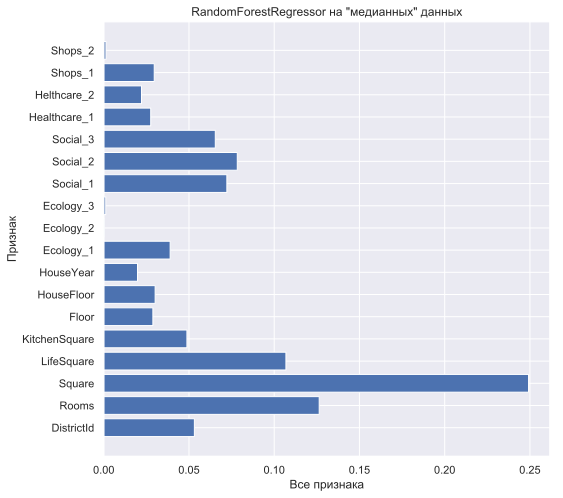

In [136]:
sns.set(rc={'figure.figsize':(8.,8.)})
plt.barh(feats_to_train_median, RFR_median_scaled.feature_importances_)
plt.xlabel('Все признака')
plt.ylabel('Признак')
plt.title('RandomForestRegressor на "медианных" данных')

**Попробуем применить ExtraTreesRegressor c кросс-валидацией для "медианных" данных:**

In [137]:
from sklearn.ensemble import ExtraTreesRegressor

In [138]:
# parameters = [{'n_estimators': [500, 750, 100],
#               'max_features': np.arange(3, 8),
#               'max_depth': np.arange(10, 30)}]
# print(parameters)
# median_gridsearch2 = GridSearchCV(estimator=ExtraTreesRegressor(random_state=GLOBAL_RANDOM_STATE),
#                   param_grid=parameters,
#                   cv=5,
#                   n_jobs=-1)
# start_time = time.time()
# median_gridsearch2.fit(train_median_scaled[feats_to_train_median], train_median_scaled['Price'])
# print("Train time: %.3f" % (time.time()-start_time))
# median_gridsearch2_best_params = median_gridsearch2.best_params_
# median_gridsearch2_best_params

In [139]:
# clf = median_gridsearch2
# means_test = clf.cv_results_['mean_test_score']
# stds_test = clf.cv_results_['std_test_score']

# means_train = clf.cv_results_['mean_train_score']
# stds_train = clf.cv_results_['std_train_score']

# for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
#     print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

**Полученное лучшее значение параметров для ExtraTreesRegressor:**  
{'max_depth': 20, 'max_features': 6, 'n_estimators': 1000}

In [140]:
median_gridsearch2_best_params = {'max_depth': 20, 'max_features': 6, 'n_estimators': 1000}

In [141]:
ETR_median_scaled = ExtraTreesRegressor(random_state=GLOBAL_RANDOM_STATE, n_jobs=-1, min_samples_leaf=2)
ETR_median_scaled.set_params(**median_gridsearch2_best_params)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
          max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=2, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
          oob_score=False, random_state=158, verbose=0, warm_start=False)

In [142]:
mse_etr_median_scaled, mae_etr_median_scaled, r2_etr_median_scaled = create_model(train_median_scaled, train_median_scaled['Price'], valid_median_scaled, valid_median_scaled['Price'], feats_to_train_median, ETR_median_scaled)

Test data:
	MSE: 2274796042.44740
	MAE: 28441.51039
	R2_SCORE: 0.74239
Train data:
	MSE: 708725930.57269
	MAE: 16350.40172
	R2_SCORE: 0.91697


Text(0.5, 1.0, 'ExtraTreesRegressor на "медианных" данных')

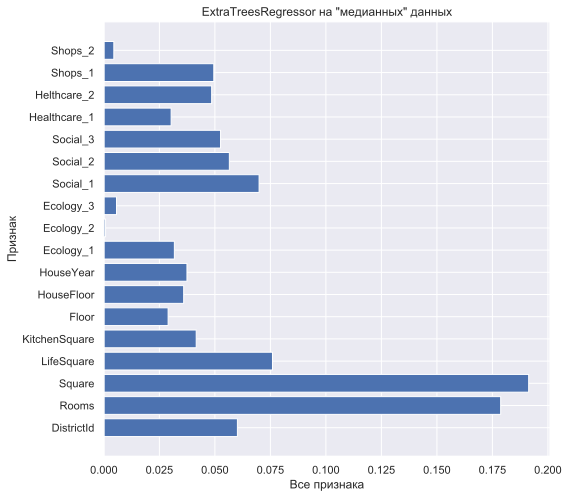

In [143]:
plt.barh(feats_to_train_median, ETR_median_scaled.feature_importances_)
plt.xlabel('Все признака')
plt.ylabel('Признак')
plt.title('ExtraTreesRegressor на "медианных" данных')

**По сравнению с линейной регрессией на "медианных" данных, метрики MAE, MSE и R2 ощутимо улучшились.**

**Попытка определить "удачную" модель для тренировочных данных, путем перебора:**

In [144]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [145]:
data = train_minmax_scaled.copy()

In [146]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(len(feats_to_train), 'Price').index
columns

Index(['Price', 'mn_rm_dstrct_prc', 'Square', 'mn_rm_prc', 'mn_rm_sqr',
       'Rooms', 'mn_dstrc_1sqr_prc', 'mn_rm_dstrct_sqr', 'LifeSquare',
       'mn_dstrct_rm', 'DistrictId', 'Social_1', 'Helthcare_2', 'Healthcare_1',
       'Social_2', 'Shops_1', 'older_1943', 'Floor', 'KitchenSquare',
       'HouseFloor', 'Social_3', 'Ecology_3', 'HouseYear', 'Id', 'Ecology_2',
       'Ecology_1', 'mn_dstrct_hflr', 'Shops_2', 'mn_dstrct_hyr'],
      dtype='object')

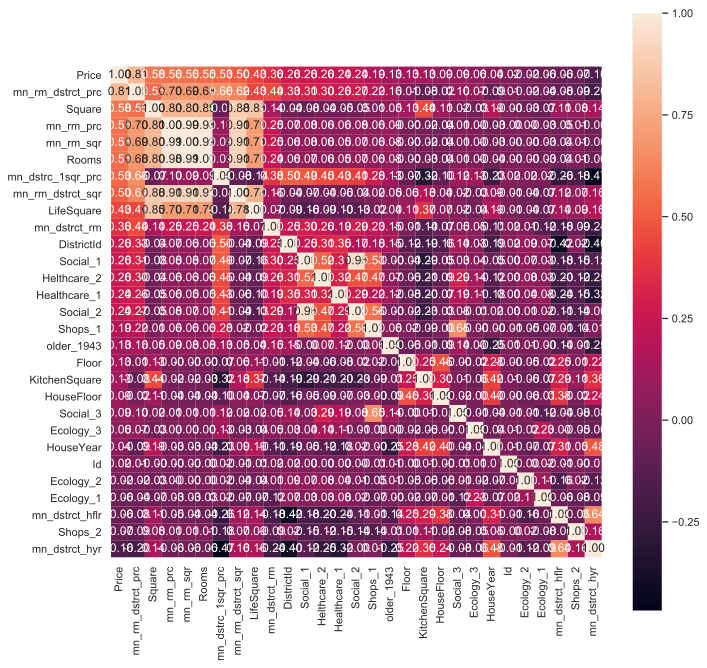

In [147]:
sns.set(rc={'figure.figsize':(11.,11.)})
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [148]:
X = data[columns]
Y = X['Price'].values
X = X.drop('Price', axis = 1).values

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [150]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBR', Pipeline([('Scaler', StandardScaler()),('GBR', GradientBoostingRegressor())])))
pipelines.append(('ScaledSVR_RBF', Pipeline([('Scaler', StandardScaler()),('SVR_RBF', SVR(kernel='rbf'))])))
pipelines.append(('ScaledSVR_Linear', Pipeline([('Scaler', StandardScaler()),('SVR_Linear', SVR(kernel='linear'))])))
pipelines.append(('ScaledSVR_Poly', Pipeline([('Scaler', StandardScaler()),('SVR_Poly', SVR(kernel='poly'))])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledETR', Pipeline([('Scaler', StandardScaler()),('ETR', ExtraTreesRegressor(n_estimators=100))])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('ETR', RandomForestRegressor(n_estimators=100))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=GLOBAL_RANDOM_STATE)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='r2', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.748156 (0.025020)
ScaledLASSO: 0.748160 (0.025012)
ScaledEN: 0.690348 (0.021890)
ScaledKNN: 0.683146 (0.031620)
ScaledCART: 0.522796 (0.046805)
ScaledGBR: 0.762546 (0.019636)
ScaledSVR_RBF: -0.053579 (0.018363)
ScaledSVR_Linear: 0.232259 (0.018484)
ScaledSVR_Poly: -0.047238 (0.017395)
ScaledRidge: 0.748163 (0.025004)
ScaledETR: 0.746310 (0.014528)
ScaledRFR: 0.754413 (0.017375)


**Попробуем применить RandomForestRegressor c кросс-валидацией для подготовленных, исправленных данных:**

In [188]:
#X_tr, X_val, y_tr, y_val = train_std_scaled[feats_to_train], valid_std_scaled[feats_to_train], train_std_scaled['Price'], valid_std_scaled['Price']
X_tr, X_val, y_tr, y_val = train_minmax_scaled[feats_to_train], valid_minmax_scaled[feats_to_train], train_minmax_scaled['Price'], valid_minmax_scaled['Price']
#X_tr, X_val, y_tr, y_val = train_robust_scaled[feats_to_train], valid_robust_scaled[feats_to_train], train_robust_scaled['Price'], valid_robust_scaled['Price']
#X_tr, X_val, y_tr, y_val = train[feats_to_train], valid[feats_to_train], train['Price'], valid['Price']

In [189]:
parameters = [{'n_estimators': [250, 500, 750, 1000],
               'max_features': np.arange(3, 8),
              'max_depth': np.arange(15,30)
              }]
parameters

[{'n_estimators': [250, 500, 750, 1000],
  'max_features': array([3, 4, 5, 6, 7]),
  'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}]

In [190]:
kfold = KFold(n_splits=5, random_state=GLOBAL_RANDOM_STATE, shuffle=True)
clean_data_rfr_gridsearch = GridSearchCV(estimator=RandomForestRegressor(random_state=GLOBAL_RANDOM_STATE),
                                        param_grid=parameters,
                                        cv=kfold,
                                        n_jobs=-1,
                                         verbose=1)
start_time = time.time()
clean_data_rfr_gridsearch.fit(X_tr, y_tr)
print("Train time: %.3f" % (time.time()-start_time))
rfr_clean_data_best_params = clean_data_rfr_gridsearch.best_params_
rfr_clean_data_best_params

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 14.3min finished


Train time: 869.316


{'max_depth': 16, 'max_features': 7, 'n_estimators': 1000}

In [191]:
clf = clean_data_rfr_gridsearch
means_test = clf.cv_results_['mean_test_score']
stds_test = clf.cv_results_['std_test_score']

means_train = clf.cv_results_['mean_train_score']
stds_train = clf.cv_results_['std_train_score']

for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
    print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

Test: 0.744 (+/-0.047); Train: 0.940 (+/-0.004); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 250}
Test: 0.744 (+/-0.047); Train: 0.941 (+/-0.004); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 500}
Test: 0.744 (+/-0.047); Train: 0.941 (+/-0.004); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 750}
Test: 0.744 (+/-0.047); Train: 0.941 (+/-0.003); Params: {'max_depth': 15, 'max_features': 3, 'n_estimators': 1000}
Test: 0.748 (+/-0.048); Train: 0.946 (+/-0.003); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 250}
Test: 0.748 (+/-0.049); Train: 0.946 (+/-0.003); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 500}
Test: 0.749 (+/-0.049); Train: 0.946 (+/-0.003); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 750}
Test: 0.749 (+/-0.049); Train: 0.946 (+/-0.003); Params: {'max_depth': 15, 'max_features': 4, 'n_estimators': 1000}
Test: 0.752 (+/-0.048); Train: 0.949 (+/-0.003); Params: {'max_depth': 15, 'ma

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


**Лучшие параметры:**  
{'max_depth': 25, 'max_features': 4, 'n_estimators': 500}


In [195]:
rfr_clean_data_best_params = {'max_depth': 25, 'max_features': 4, 'n_estimators': 500}
rfr_clean_data_best_params = {'max_depth': 16, 'max_features': 7, 'n_estimators': 250}

In [198]:
rfr_clean_data_model = RandomForestRegressor(n_jobs=-1, random_state=GLOBAL_RANDOM_STATE, min_samples_leaf=2)
rfr_clean_data_model.set_params(**rfr_clean_data_best_params)
rfr_clean_mse, rfr_clean_mae, rfr_clean_r2 = create_model(X_tr, y_tr, X_val, y_val, feats_to_train, rfr_clean_data_model)

Test data:
	MSE: 2414186115.30613
	MAE: 28614.36327
	R2_SCORE: 0.72660
Train data:
	MSE: 693310498.44472
	MAE: 15742.65421
	R2_SCORE: 0.91878


**Попробуем применить ExtraTreesRegressor c кросс-валидацией для подготовленных, исправленных данных:**

In [157]:
# parameters = [{'n_estimators': [250, 500, 750, 1000],
#                'max_features': np.arange(3, 8),
#               'max_depth': np.arange(15,30)
#               }]
# parameters

In [158]:
# kfold = KFold(n_splits=5, random_state=GLOBAL_RANDOM_STATE, shuffle=True)
# clean_data_etr_gridsearch = GridSearchCV(estimator=ExtraTreesRegressor(random_state=GLOBAL_RANDOM_STATE),
#                   param_grid=parameters,
#                   cv=kfold,
#                   n_jobs=-1,
#                     verbose=1)
# start_time = time.time()
# clean_data_etr_gridsearch.fit(X_tr, y_tr)
# print("Train time: %.3f" % (time.time()-start_time))
# etr_clean_data_best_params = clean_data_rfr_gridsearch.best_params_
# etr_clean_data_best_params

In [159]:
# clf = clean_data_etr_gridsearch
# means_test = clf.cv_results_['mean_test_score']
# stds_test = clf.cv_results_['std_test_score']

# means_train = clf.cv_results_['mean_train_score']
# stds_train = clf.cv_results_['std_train_score']

# for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
#     print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

**Лучшие параметры:**  


In [160]:
etr_clean_data_best_params = {'max_depth': 20, 'max_features': 6, 'n_estimators': 1000}

In [161]:
etr_clean_data_model = ExtraTreesRegressor(n_jobs=-1, random_state=GLOBAL_RANDOM_STATE)
etr_clean_data_model.set_params(**etr_clean_data_best_params)
etr_clean_mse, etr_clean_mae, etr_clean_r2 = create_model(X_tr, y_tr, X_val, y_val, X_tr.columns, etr_clean_data_model)

Test data:
	MSE: 2460273452.59011
	MAE: 28660.53833
	R2_SCORE: 0.72138
Train data:
	MSE: 121293815.84085
	MAE: 6701.48253
	R2_SCORE: 0.98579


**Попробуем применить GradientBoostingRegressor c кросс-валидацией для подготовленных, исправленных данных:**

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

In [163]:
X_tr.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
0,5.0,2.0,54.477432,31.149444,7.000000,14.0,22.0,1991.0,0.150818,0.0,0.0,16.0,3433.0,4.0,2643.0,4.0,5.0,0.0,213585.491921,215850.540509,56.362567,47.651068,1.521739,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,13.565217,1979.347826,4870.394033
1,9.0,1.0,45.003482,27.205538,8.000000,3.0,14.0,1996.0,0.161532,0.0,0.0,25.0,5648.0,1.0,30.0,2.0,4.0,0.0,141533.438397,160603.592917,40.898977,43.119159,2.038462,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,11.802885,1988.644231,3229.478133
2,30.0,2.0,64.304289,41.742549,9.525954,9.0,8.0,2014.0,0.000078,0.0,0.0,22.0,6398.0,141.0,1046.0,3.0,23.0,0.0,178061.629248,215850.540509,56.362567,64.037937,1.849673,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,14.529412,1992.823529,2804.077806
3,8.0,2.0,46.231052,26.159755,5.000000,6.0,5.0,1968.0,0.092291,0.0,0.0,21.0,4346.0,2.0,165.0,1.0,2.0,0.0,206217.164465,215850.540509,56.362567,50.698607,1.907216,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,13.402062,1987.030928,4065.685405
4,97.0,2.0,55.576261,24.677650,10.000000,8.0,16.0,1982.0,0.306977,0.0,0.0,27.0,5148.0,14.0,1575.0,5.0,7.0,0.0,333172.627751,215850.540509,56.362567,63.342287,1.428571,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,9.714286,1964.142857,5333.572031


In [179]:
# parameters = {"n_estimators": [1000, 1500, 2000],
#              "learning_rate": [0.0001, 0.001, 0.01, 0.1],
#               "max_depth": [3,4,5,6,7,8,9,10],
#               "max_features": [1,2,3,4,5,6,7,8,9,10, len(feats_to_train)]
#              }
# parameters

{'n_estimators': [1000, 1500, 2000],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 36]}

In [180]:
# kfold = KFold(n_splits=5, random_state=GLOBAL_RANDOM_STATE, shuffle=True)
# clean_data_gbr_gridsearch = GridSearchCV(estimator=GradientBoostingRegressor(random_state=GLOBAL_RANDOM_STATE),
#                                         param_grid=parameters,
#                                         cv=kfold,
#                                         n_jobs=-1,
#                                          verbose=1)
# start_time = time.time()
# clean_data_gbr_gridsearch.fit(X_tr, y_tr)
# print("Train time: %.3f" % (time.time()-start_time))
# gbr_clean_data_best_params = clean_data_gbr_gridsearch.best_params_
# gbr_clean_data_best_params

Fitting 5 folds for each of 1056 candidates, totalling 5280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 21.1min
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\pomaz\A

Train time: 5725.224


{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 10,
 'n_estimators': 2000}

In [181]:
# clf = clean_data_gbr_gridsearch
# means_test = clf.cv_results_['mean_test_score']
# stds_test = clf.cv_results_['std_test_score']

# means_train = clf.cv_results_['mean_train_score']
# stds_train = clf.cv_results_['std_train_score']

# for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
#     print("Test: %0.3f; Train: %0.3f; Params: %r" % (mean_tst, mean_trn, params))

Test: 0.051; Train: 0.053; Params: {'learning_rate': 0.0001, 'max_depth': 3, 'max_features': 1, 'n_estimators': 1000}
Test: 0.077; Train: 0.079; Params: {'learning_rate': 0.0001, 'max_depth': 3, 'max_features': 1, 'n_estimators': 1500}
Test: 0.100; Train: 0.103; Params: {'learning_rate': 0.0001, 'max_depth': 3, 'max_features': 1, 'n_estimators': 2000}
Test: 0.063; Train: 0.065; Params: {'learning_rate': 0.0001, 'max_depth': 3, 'max_features': 2, 'n_estimators': 1000}
Test: 0.093; Train: 0.096; Params: {'learning_rate': 0.0001, 'max_depth': 3, 'max_features': 2, 'n_estimators': 1500}
Test: 0.121; Train: 0.125; Params: {'learning_rate': 0.0001, 'max_depth': 3, 'max_features': 2, 'n_estimators': 2000}
Test: 0.073; Train: 0.076; Params: {'learning_rate': 0.0001, 'max_depth': 3, 'max_features': 3, 'n_estimators': 1000}
Test: 0.108; Train: 0.111; Params: {'learning_rate': 0.0001, 'max_depth': 3, 'max_features': 3, 'n_estimators': 1500}
Test: 0.139; Train: 0.143; Params: {'learning_rate': 0.0

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


**Лучшие параметры:**

In [186]:
# gbr_clean_data_best_params = {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 5, 'n_estimators': 1500}
# gbr_clean_data_best_params = {'learning_rate': 0.01, 'max_depth': 6, 'max_features': 6, 'n_estimators': 1000}
gbr_clean_data_best_params = {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 10, 'n_estimators': 2000}

In [187]:
gbr_clean_data_model = GradientBoostingRegressor(random_state=GLOBAL_RANDOM_STATE, min_samples_leaf=3)
gbr_clean_data_model.set_params(**gbr_clean_data_best_params)
gbr_clean_mse, gbr_clean_mae, gbr_clean_r2 = create_model(X_tr, y_tr, X_val, y_val, X_tr.columns, gbr_clean_data_model)

Test data:
	MSE: 2364632367.79035
	MAE: 28408.65883
	R2_SCORE: 0.73221
Train data:
	MSE: 838764599.05525
	MAE: 18494.54492
	R2_SCORE: 0.90174


**GradientBoostingRegressor показала лучший результат R2, поэтому получим тестовые данные на этой модели:**

In [169]:
test_pred = gbr_clean_data_model.predict(test_raw[feats_to_train])

In [170]:
test_pred

array([151612.11330765, 229223.98822235, 180833.39529055, ...,
       297087.76752985, 194283.15543438, 178522.91786022])

In [171]:
test_pred.shape

(5000,)

In [172]:
test_raw['Price'] = test_pred

In [173]:
test_raw.shape

(5000, 38)

In [174]:
test_raw['Id'] = test_raw['Id'].astype(int)

In [175]:
test_raw.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
0,725,58.0,2.0,49.882643,33.432782,6.000000,6.0,14.0,1972.0,0.310199,0.0,0.0,11.0,2748.0,1.0,297.113333,0.0,0.0,0.0,151612.113308,171867.909310,215850.540509,56.362567,61.282668,1.633929,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,11.991071,1985.035714,2836.021673
1,15856,74.0,2.0,69.263183,44.961570,10.260558,6.0,1.0,1977.0,0.075779,0.0,0.0,6.0,1437.0,3.0,1217.710000,0.0,2.0,0.0,229223.988222,241034.631050,215850.540509,56.362567,74.453922,1.678571,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,13.845238,1990.750000,3284.053418
2,5480,190.0,1.0,26.450358,15.948246,7.012601,2.0,5.0,1909.0,0.000000,0.0,0.0,30.0,7538.0,87.0,4702.000000,5.0,5.0,0.0,180833.395291,160603.592917,160603.592917,40.898977,40.898977,2.400000,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,1,11.000000,1953.000000,7312.154972
3,15664,47.0,2.0,73.046609,51.940842,9.000000,22.0,22.0,2007.0,0.101872,0.0,0.0,23.0,4583.0,3.0,2811.079505,3.0,3.0,0.0,291347.688777,209822.229403,215850.540509,56.362567,53.649594,1.935484,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,13.500000,1984.854839,4036.840437
4,14275,27.0,1.0,47.527111,43.387569,12.600535,17.0,17.0,2017.0,0.072158,0.0,0.0,2.0,629.0,1.0,228.560000,0.0,0.0,1.0,133903.745414,122757.222524,160603.592917,40.898977,42.922219,1.802345,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,12.107203,1994.396985,2682.815915


In [176]:
test_raw.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mn_rm_dstrct_prc,mn_rm_prc,mn_rm_sqr,mn_rm_dstrct_sqr,mn_dstrct_rm,mn_Social_1,mn_Social_2,mn_Social_3,mn_Healthcare_1,mn_Helthcare_2,mn_Ecology_1,mn_Ecology_2,mn_Ecology_3,mn_Shops_1,older_1943,mn_dstrct_hflr,mn_dstrct_hyr,mn_dstrc_1sqr_prc
4995,8180,11.0,3.0,67.133911,50.809797,6.000000,5.0,9.0,1973.0,0.000170,0.0,0.0,36.0,5992.0,0.0,1824.293333,1.0,1.0,0.0,244277.728618,252673.835565,285637.392979,77.083985,64.685984,2.010000,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,10.230000,1974.490000,4054.908592
4996,4695,1.0,1.0,40.198472,21.807061,10.000000,12.0,17.0,2017.0,0.007122,0.0,0.0,1.0,264.0,0.0,331.035673,0.0,1.0,0.0,138850.079491,149039.253601,160603.592917,40.898977,43.764540,1.820896,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,16.767591,1985.275053,3165.638940
4997,5783,12.0,3.0,77.842178,48.282625,9.000000,23.0,22.0,1989.0,0.090799,0.0,0.0,74.0,19083.0,2.0,1278.433333,5.0,15.0,0.0,297087.767530,267263.560548,285637.392979,77.083985,76.512428,1.756098,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,14.195122,1990.317073,3973.430362
4998,4780,62.0,2.0,81.305222,52.778551,12.044450,4.0,4.0,1977.0,0.072158,0.0,0.0,2.0,629.0,1.0,260.026667,0.0,0.0,1.0,194283.155434,182109.319142,215850.540509,56.362567,69.670905,1.780899,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,10.837079,1989.696629,2704.623065
4999,12504,30.0,2.0,60.555693,39.309181,8.970642,10.0,17.0,1977.0,0.000078,0.0,0.0,22.0,6398.0,141.0,1046.000000,3.0,23.0,0.0,178522.917860,178061.629248,215850.540509,56.362567,64.037937,1.849673,24.557286,5320.917571,7.969714,1008.067401,1.302,0.119172,0.009143,0.028429,4.202714,0,14.529412,1992.823529,2804.077806


In [177]:
test_raw.loc[:, ['Id', 'Price']].head()

,Id,Price
0,725,151612.113308
1,15856,229223.988222
2,5480,180833.395291
3,15664,291347.688777
4,14275,133903.745414


In [178]:
test_raw.loc[:, ['Id', 'Price']].to_csv('NPomazan_predictions_%s.csv' % str("%.5f" % gbr_clean_r2), index=None)

In [264]:
from sklearn.feature_selection import RFE, RFECV

In [265]:
mdl = RandomForestRegressor(n_estimators=100, random_state=GLOBAL_RANDOM_STATE)

In [266]:
selector = RFECV(mdl, step=1, cv=5, n_jobs=-1, scoring='r2')

In [267]:
selector = selector.fit(X_tr, y_tr)

In [268]:
selector.support_

array([False, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True])

In [269]:
selector.ranking_

array([ 4,  9,  1,  1,  1,  1,  1,  1,  2, 15, 13,  1,  1,  3,  1,  8,  7,
       10,  1, 11, 12,  1,  6, 17, 22, 23, 21, 16, 18, 19, 20, 24, 14,  5,
        1,  1])

In [270]:
X_tr.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'mn_rm_dstrct_prc', 'mn_rm_prc', 'mn_rm_sqr',
       'mn_rm_dstrct_sqr', 'mn_dstrct_rm', 'mn_Social_1', 'mn_Social_2',
       'mn_Social_3', 'mn_Healthcare_1', 'mn_Helthcare_2', 'mn_Ecology_1',
       'mn_Ecology_2', 'mn_Ecology_3', 'mn_Shops_1', 'older_1943',
       'mn_dstrct_hflr', 'mn_dstrct_hyr', 'mn_dstrc_1sqr_prc'],
      dtype='object')

In [271]:
aa = pd.DataFrame(X_tr.columns, columns=['Features'])


In [272]:
aa['ranking'] = selector.ranking_

In [273]:
aa['support'] = selector.support_

In [274]:
aa

,Features,ranking,support
0,DistrictId,4,False
1,Rooms,9,False
2,Square,1,True
3,LifeSquare,1,True
4,KitchenSquare,1,True
5,Floor,1,True
6,HouseFloor,1,True
7,HouseYear,1,True
8,Ecology_1,2,False
9,Ecology_2,15,False


In [275]:
aa.loc[aa.support== True]

,Features,ranking,support
2,Square,1,True
3,LifeSquare,1,True
4,KitchenSquare,1,True
5,Floor,1,True
6,HouseFloor,1,True
7,HouseYear,1,True
11,Social_1,1,True
12,Social_2,1,True
14,Healthcare_1,1,True
18,mn_rm_dstrct_prc,1,True


In [278]:
aa.sort_values(by=['ranking'])

,Features,ranking,support
35,mn_dstrc_1sqr_prc,1,True
21,mn_rm_dstrct_sqr,1,True
2,Square,1,True
3,LifeSquare,1,True
4,KitchenSquare,1,True
5,Floor,1,True
6,HouseFloor,1,True
7,HouseYear,1,True
18,mn_rm_dstrct_prc,1,True
34,mn_dstrct_hyr,1,True


In [277]:
selector.n_features_

13

In [299]:
aa_train_features = aa.loc[aa.ranking < 11].Features.tolist()
aa_train_features

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'mn_rm_dstrct_prc',
 'mn_rm_dstrct_sqr',
 'mn_dstrct_rm',
 'mn_dstrct_hflr',
 'mn_dstrct_hyr',
 'mn_dstrc_1sqr_prc']

In [300]:
parameters = [{'n_estimators': [250, 500],
               'max_features': np.arange(1, 6),
              'max_depth': np.arange(10,15)
              }]
print(parameters)

kfold = KFold(n_splits=5, random_state=GLOBAL_RANDOM_STATE, shuffle=True)
clean_data_rfr_gridsearch = GridSearchCV(estimator=RandomForestRegressor(random_state=GLOBAL_RANDOM_STATE),
                                        param_grid=parameters,
                                        cv=kfold,
                                        n_jobs=-1,
                                         verbose=1)
start_time = time.time()
clean_data_rfr_gridsearch.fit(X_tr[aa_train_features], y_tr)
print("Train time: %.3f" % (time.time()-start_time))
rfr_clean_data_best_params = clean_data_rfr_gridsearch.best_params_
rfr_clean_data_best_params


clf = clean_data_rfr_gridsearch
means_test = clf.cv_results_['mean_test_score']
stds_test = clf.cv_results_['std_test_score']

means_train = clf.cv_results_['mean_train_score']
stds_train = clf.cv_results_['std_train_score']

for mean_tst, std_tst, mean_trn, std_trn, params in zip(means_test, stds_test, means_train, stds_train, clf.cv_results_['params']):
    print("Test: %0.3f (+/-%0.03f); Train: %0.3f (+/-%0.03f); Params: %r" % (mean_tst, std_tst * 2, mean_trn, std_trn * 2, params))

[{'n_estimators': [250, 500], 'max_features': array([1, 2, 3, 4, 5]), 'max_depth': array([10, 11, 12, 13, 14])}]
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   57.9s finished


Train time: 61.828
Test: 0.710 (+/-0.042); Train: 0.822 (+/-0.012); Params: {'max_depth': 10, 'max_features': 1, 'n_estimators': 250}
Test: 0.710 (+/-0.044); Train: 0.823 (+/-0.011); Params: {'max_depth': 10, 'max_features': 1, 'n_estimators': 500}
Test: 0.739 (+/-0.045); Train: 0.862 (+/-0.009); Params: {'max_depth': 10, 'max_features': 2, 'n_estimators': 250}
Test: 0.738 (+/-0.045); Train: 0.862 (+/-0.007); Params: {'max_depth': 10, 'max_features': 2, 'n_estimators': 500}
Test: 0.748 (+/-0.049); Train: 0.876 (+/-0.007); Params: {'max_depth': 10, 'max_features': 3, 'n_estimators': 250}
Test: 0.749 (+/-0.048); Train: 0.877 (+/-0.007); Params: {'max_depth': 10, 'max_features': 3, 'n_estimators': 500}
Test: 0.754 (+/-0.046); Train: 0.885 (+/-0.006); Params: {'max_depth': 10, 'max_features': 4, 'n_estimators': 250}
Test: 0.755 (+/-0.046); Train: 0.886 (+/-0.007); Params: {'max_depth': 10, 'max_features': 4, 'n_estimators': 500}
Test: 0.756 (+/-0.048); Train: 0.890 (+/-0.006); Params: {'ma

C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pomaz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [301]:
rfr_clean_data_best_params

{'max_depth': 12, 'max_features': 5, 'n_estimators': 500}

In [302]:
rfr_clean_data_model = RandomForestRegressor(n_jobs=-1, random_state=GLOBAL_RANDOM_STATE, min_samples_leaf=1)


In [303]:
rfr_clean_data_model.set_params(**rfr_clean_data_best_params)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=158,
           verbose=0, warm_start=False)

In [304]:
rfr_clean_mse, rfr_clean_mae, rfr_clean_r2 = create_model(X_tr, y_tr, X_val, y_val, feats_to_train, rfr_clean_data_model)

Test data:
	MSE: 2403222943.18435
	MAE: 28925.41617
	R2_SCORE: 0.72784
Train data:
	MSE: 780354047.87385
	MAE: 18114.84939
	R2_SCORE: 0.90858


Optimal number of features : 13


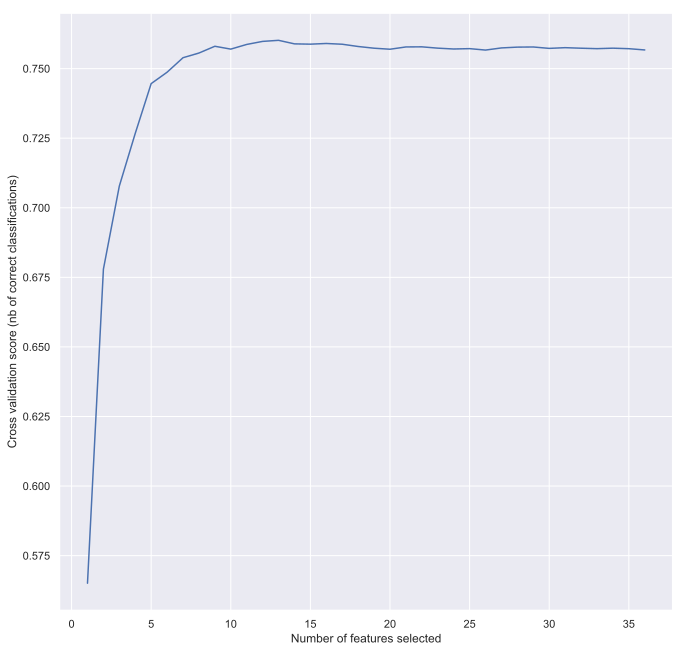

In [306]:
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()